In [1]:
import numpy as np
from scipy import linalg
from scipy import signal
from scipy import special

import copy

In [2]:
# Plotting.
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cm

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


In [3]:
from tqdm import notebook

In [4]:
from pathlib import Path

In [5]:
# figure_directory = Path("/Users/noahtoyonaga/Documents/2022/coursework_fall_22/AM_254/final_project/final_presentation/figures") 
figure_directory = Path("/Users/quinoah/Documents/2022/coursework_fall_22/AM254/final_project/Figures")


# Plot 1D array

In [6]:
import math
import numpy as np

def spring_coords(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """
    x = np.linspace(start, end, nodes)
    y = np.zeros_like(x)
    for i in range(1, nodes-1):
        y[i] = (-1) ** i * width
        
    return x, y

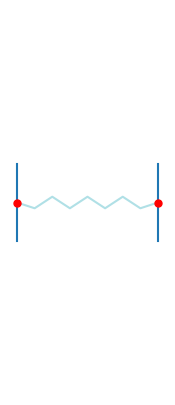

In [7]:
node_count = 2
x0 = np.linspace(0, 1, node_count)

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

spring_locations = np.argwhere(np.triu(k))



fig, ax = plt.subplots(1, 1, figsize=(2, 5))

y0 = np.zeros(node_count)


for x_ in x0:
    ax.axvline(x_, ymin=.4, ymax = .6)

for sl in spring_locations:
    x, y = spring_coords(x0[sl[0]], x0[sl[1]], 9, .03)
    ax.plot(x, y, color = 'powderblue')
    
    
    # Plot nodes
ax.plot(x0, y0, 'ro', ms=5)


ax.set_ylim(-1, 1)

ax.set_axis_off()




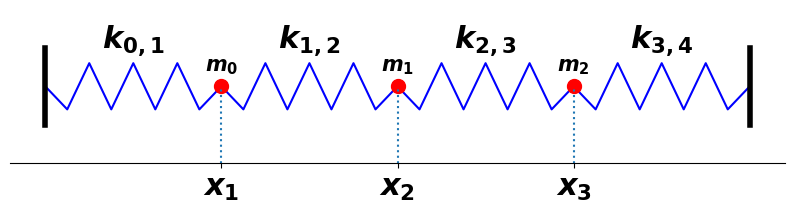

In [8]:
node_count = 5
x0 = np.linspace(0, 1, node_count)

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

spring_locations = np.argwhere(np.triu(k))



fig, ax = plt.subplots(1, 1, figsize=(10, 2), frameon=False)

y0 = np.zeros(node_count)


# for x_ in x0:
#     ax.axvline(x_, ymin=.4, ymax = .6)

for sl in spring_locations:
    x, y = spring_coords(x0[sl[0]], x0[sl[1]], 9, .3)
    ax.plot(x, y, color = 'Blue')

    
# Plot nodes
ax.plot(x0[1:-1], y0[1:-1], 'ro', ms=10)

# boundary
ax.axvline(x0[0], ymin=.25, ymax=.75, color="black", linewidth=4)
ax.axvline(x0[-1], ymin=.25, ymax=.75,  color="black", linewidth=4)



# annotate.

for i in range(3):
    ax.axvline(x0[i + 1], ymin=-1, ymax=.5, linestyle='dotted')
    ax.text(x0[i + 1], .2, f"$m_{i}$", fontsize=15, horizontalalignment="center")

    text = f"{i},{i+1}"
    text = f"{{{text}}}"
    ax.text(.25 * (i + .5), .5, f"$k_{text}$", horizontalalignment="center")
ax.text(.25 * (3 + .5), .5, "$k_{3,4}$", horizontalalignment="center")




# ax.set_aspect("auto")

ax.get_yaxis().set_visible(False)

ax.set_xticks((.25, .5, .75), labels=[f"$x_{i+1}$" for i in range(3)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_visible(False)

# ylim
ax.set_ylim(-1, 1.)


filename=figure_directory.joinpath("equilibrium_array.png")
plt.savefig(filename, bbox_inches="tight")



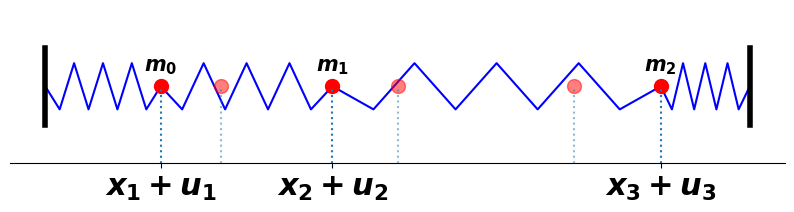

In [9]:
node_count = 5
x0 = np.linspace(0, 1, node_count)

u = np.random.uniform(-.15,.15, node_count)
u[0] = 0
u[-1]=0

xnew = x0 + u

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

spring_locations = np.argwhere(np.triu(k))



fig, ax = plt.subplots(1, 1, figsize=(10, 2), frameon=False)

y0 = np.zeros(node_count)


# for x_ in x0:
#     ax.axvline(x_, ymin=.4, ymax = .6)

for sl in spring_locations:
    x, y = spring_coords(xnew[sl[0]], xnew[sl[1]], 9, .3)
    ax.plot(x, y, color = 'Blue')

    
# Plot nodes
ax.plot(xnew[1:-1], y0[1:-1], 'ro', ms=10)

# Plot old nodes
ax.plot(x0[1:-1], y0[1:-1], 'ro', ms=10, alpha = .5)



# boundary
ax.axvline(x0[0], ymin=.25, ymax=.75, color="black", linewidth=4)
ax.axvline(x0[-1], ymin=.25, ymax=.75,  color="black", linewidth=4)



# # annotate.

for i in range(3):
    ax.axvline(xnew[i + 1], ymin=-1, ymax=.5, linestyle='dotted')
    ax.axvline(x0[i + 1], ymin=-1, ymax=.5, linestyle='dotted', alpha=.5)


    ax.text(xnew[i + 1], .2, f"$m_{i}$", fontsize=15, horizontalalignment="center")




# ax.set_aspect("auto")

ax.get_yaxis().set_visible(False)

ax.set_xticks(xnew[1:-1], labels=[f"$x_{i+1} + u_{i+1}$" for i in range(3)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# ylim
ax.set_ylim(-1, 1.)


filename=figure_directory.joinpath("deformed_array.png")
plt.savefig(filename, bbox_inches="tight")




# Normal spectrum

In [10]:
def stiffness_to_force(K):
    """Converts stiffness matrix to linear force.
    
    The stiffness matrix is a symmetric matrix with 0 on the
    main diagonal (as no bonds can exist between the same node).

    
    """
    # diagonal of force matrix.
    F_diag = np.diag(np.sum(K, axis=-1))
    
    # off diagional elements.
    F_off = np.transpose(K) 
    
    return - F_diag + F_off

def fix_boundary(M):
    """Fixing boundary of `M` results in setting force to zero."""
    return M[1:-1, 1:-1]



In [11]:
node_count = 100
spectrum_limit = int(node_count / 2)
k_noise_max = .0001

# Make symmetric.
nn_k = np.ones(node_count - 1) * node_count ** 2
k_nn = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# Create force matrix.
M = stiffness_to_force(k_nn)
M = fix_boundary(M)

# Periodic boundary conditions
# M[0,-1] = M[0,1]
# M[-1,0] = M[-1,-2]

# Find eigenvalues.
e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]


# e = e[:spectrum_limit:-1]
# v_plot = v_plot[:spectrum_limit:-1]

o = np.sqrt(-e)

e_chain = e
o_chain = o
v_chain = v_plot

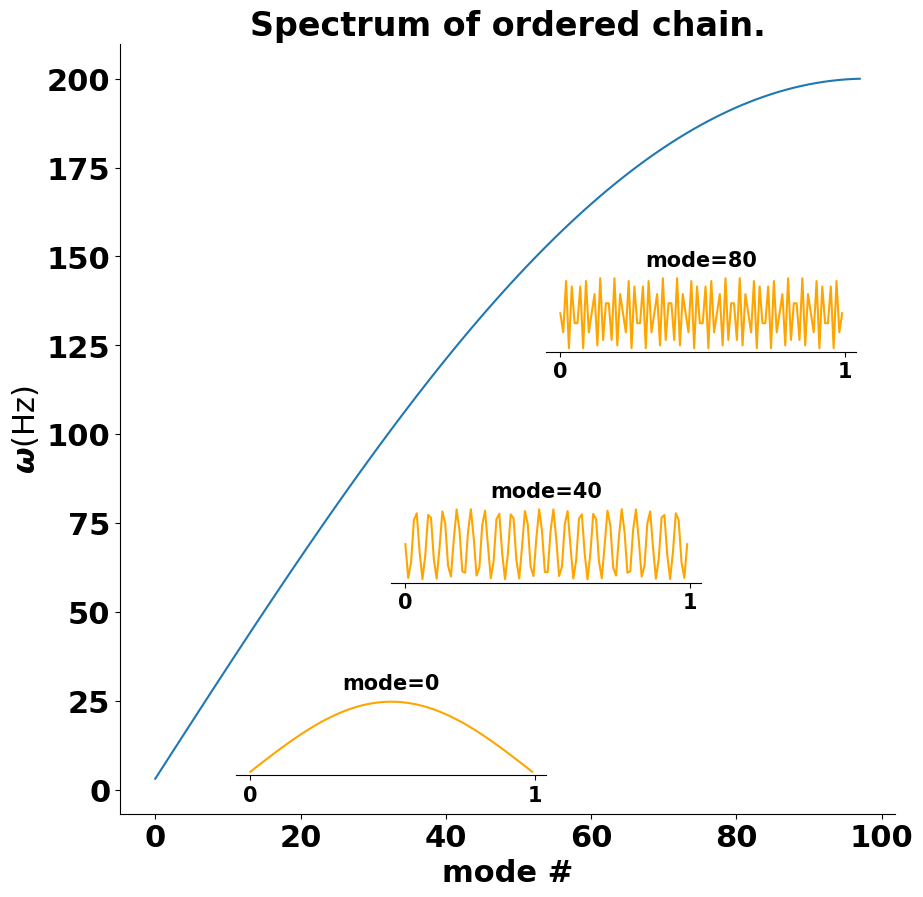

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(o)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# sample plots 
axin1 = ax.inset_axes([0.15, 0.05, 0.4, 0.1])
axin1.plot(v_plot[0], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title("mode=0", fontsize=15, weight="bold")

# sample plots 
m=40
axin1 = ax.inset_axes([0.35, 0.3, 0.4, 0.1])
axin1.plot(v_plot[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# sample plots 
m=80
axin1 = ax.inset_axes([0.55, 0.6, 0.4, 0.1])
axin1.plot(v_plot[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")




ax.set_ylabel("$\omega$(Hz)")
ax.set_xlabel("mode #", weight="bold")
ax.set_title("Spectrum of ordered chain.", weight="bold", fontsize=24)

filename=figure_directory.joinpath("ordered_spectrum.png")
plt.savefig(filename, bbox_inches="tight")

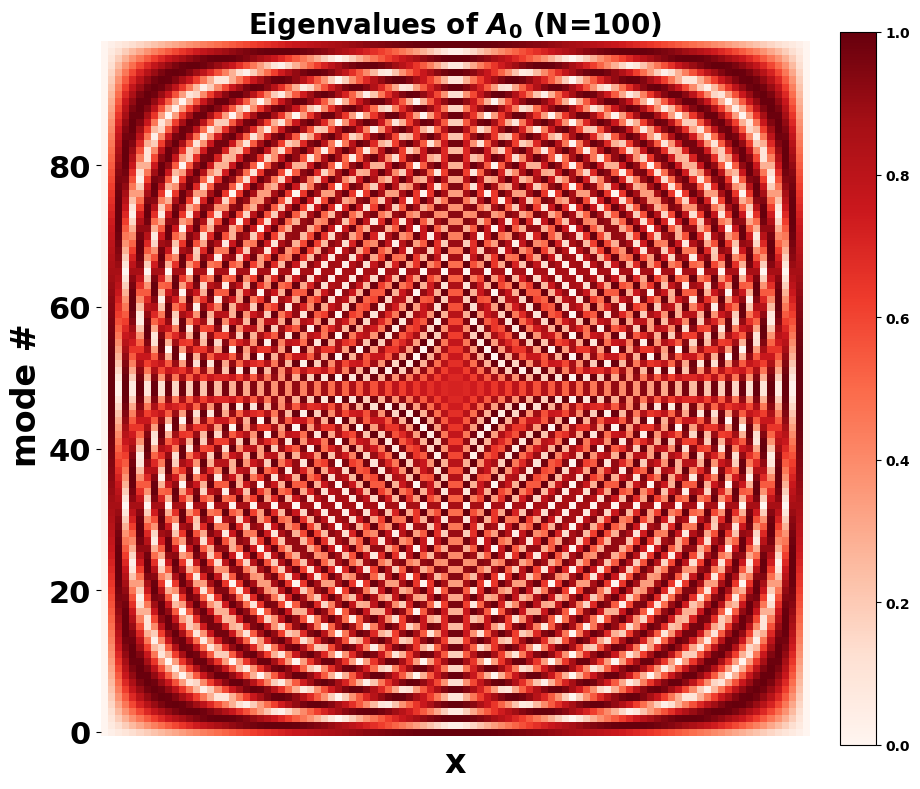

In [13]:

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title("Eigenvalues of $A_0$ (N=100)", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("array_eigenmodes.png")
plt.savefig(filename, bbox_inches="tight")


# potential noise

In [14]:
node_count = 100

# Potential noise
potential_downsample_factor = 5
potential_noise_max = 1 * node_count ** 2


# Make symmetric.
nn_k = np.ones(node_count - 1) * node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)


# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / potential_downsample_factor)
noise_vec = np.random.uniform(0, 1, noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(potential_downsample_factor)
potential_noise = np.diag(noise_vec)


# Create force matrix.
M = stiffness_to_force(k) + potential_noise


# Boundary conditions.
M = fix_boundary(M)


# Find eigenvalues.

e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_anderson = v_plot
e_anderson = e
o_anderson = o



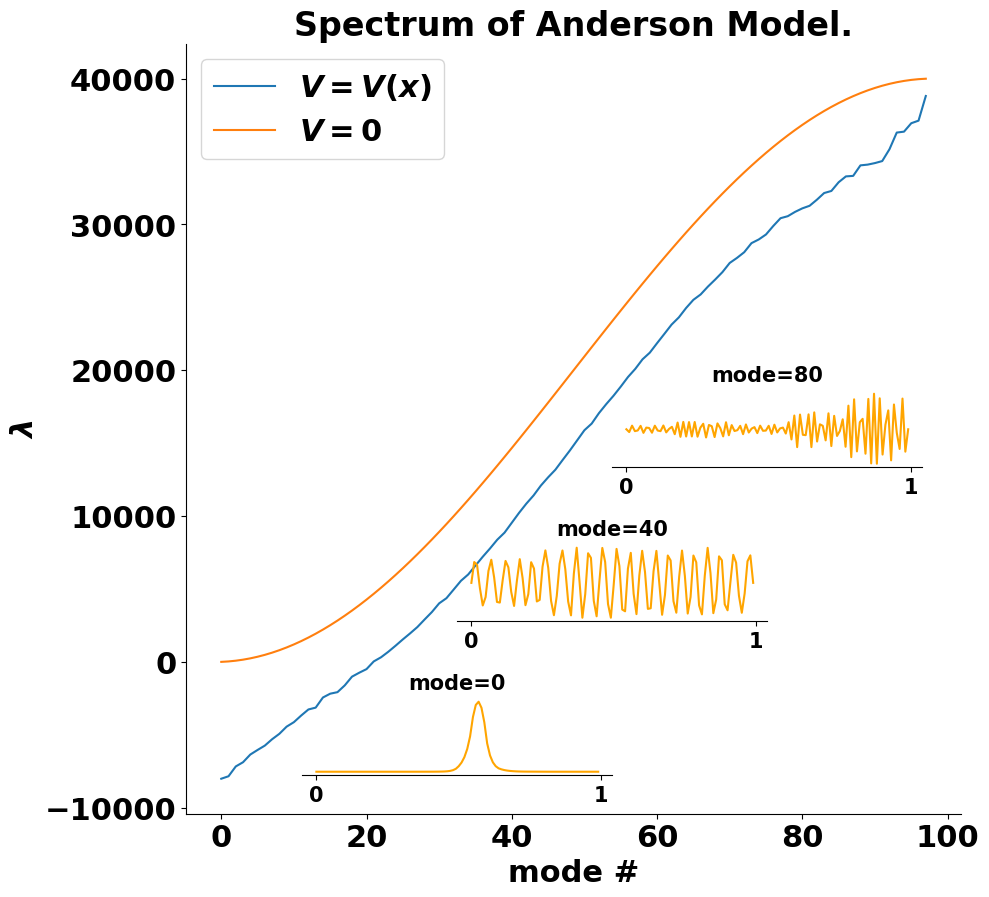

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(-e, label="$V = V(x)$")
ax.plot(-e_chain, label="$V=0$")

ax.legend(prop=dict(weight='normal'))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# sample plots 
axin1 = ax.inset_axes([0.15, 0.05, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_plot[0], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title("mode=0", fontsize=15, weight="bold")

# sample plots 
m=40
axin1 = ax.inset_axes([0.35, 0.25, 0.4, 0.1])
axin1.patch.set_alpha(0)


axin1.plot(v_plot[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# sample plots 
m=80
axin1 = ax.inset_axes([0.55, 0.45, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_plot[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# ax.set_ylim(0, 200)

ax.set_ylabel("$\\lambda$")
ax.set_xlabel("mode #", weight="bold")
ax.set_title("Spectrum of Anderson Model.", weight="bold", fontsize=24)

filename=figure_directory.joinpath("anderson_spectrum.png")
plt.savefig(filename, bbox_inches="tight")

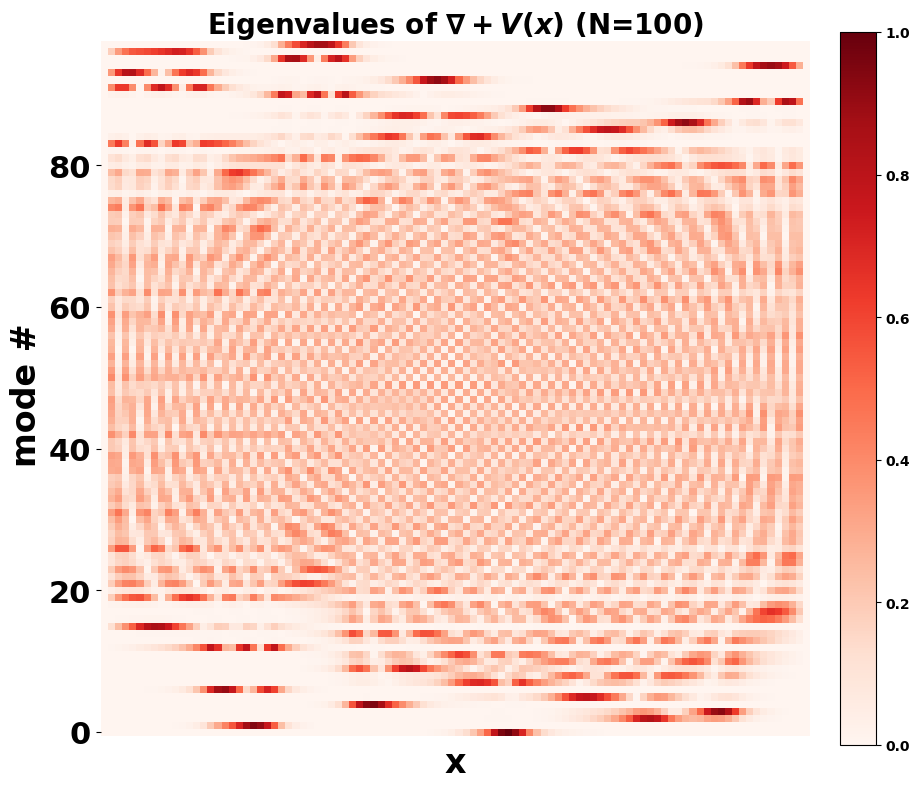

In [16]:

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title("Eigenvalues of $\\nabla + V(x)$ (N=100)", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("anderson_eigenmodes.png")
plt.savefig(filename, bbox_inches="tight")




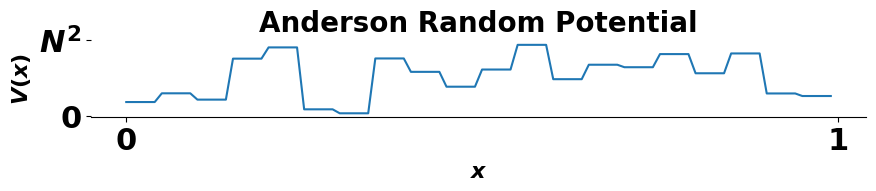

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 1))
ax.plot(noise_vec)

ax.set_xlabel("$x$", fontsize=16)
ax.set_ylabel("$V(x)$", fontsize=16)

ax.set_xticks([0, 100],[0,1])
ax.set_yticks([0, node_count ** 2], ["0", "$N^2$"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Anderson Random Potential", fontsize=20, weight="bold")

filename=figure_directory.joinpath("anderson_potential.png")
plt.savefig(filename, bbox_inches="tight")



# Localization tests.



In [18]:
import pandas as pd
from scipy import stats

In [19]:
def gaussian_entropy(node_count):
    # GOE length.
    return special.digamma(.5 * node_count + 1) - special.digamma(3/2)

In [20]:
def variance_metric(v):
    N= np.shape(v)[1]
    dx = 1/N
    x = np.arange(N) * dx
    mu = np.sum(x * v, axis=-1 )
    var = np.sum((x ** 2) * v, axis=-1 ) - mu **2
    return mu, var

def entropy(u):
    u = u + 1e-20
    u = u /  np.sqrt(np.sum(u **2, axis=-1, keepdims=True))

    # Localization.
    return -1 * np.sum(u ** 2 * np.log(u ** 2), axis = -1)



def mean_localization_length(H, node_count):
    H_mean = np.mean(H)
    H_GOE = gaussian_entropy(node_count)
    return node_count * np.exp(H_mean - H_GOE)

In [21]:

entropy_chain = entropy(v_chain)
entropy_anderson=entropy(v_anderson)

# chain
mu_chain, var_chain = variance_metric(v_chain ** 2)

# anderson
mu_anderson, var_anderson = variance_metric(v_anderson ** 2)




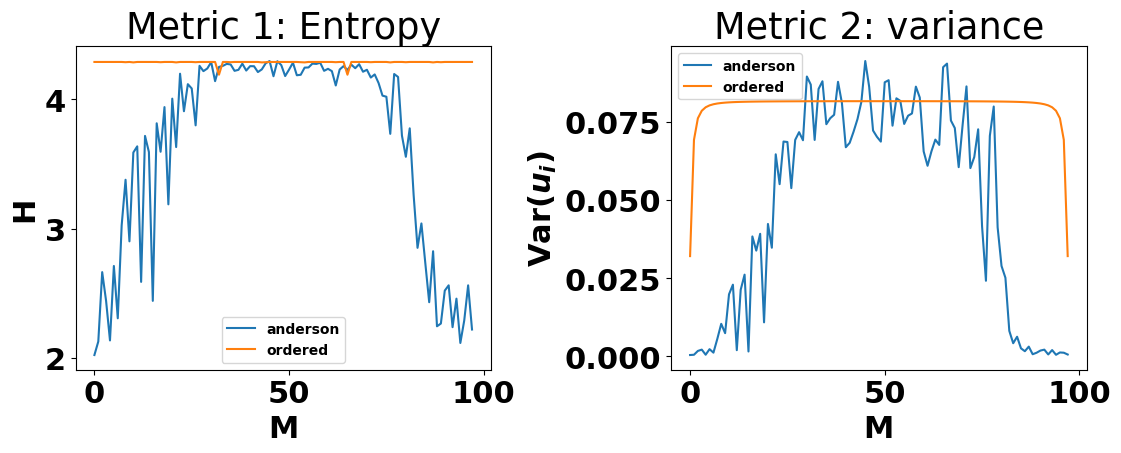

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))


ax[0].set_title("Metric 1: Entropy")
ax[0].plot(entropy_anderson, label="anderson")
ax[0].plot(entropy_chain, label="ordered", )
ax[0].legend(prop={"size":10})
ax[0].set_xlabel("M", weight="bold")
ax[0].set_ylabel("H", weight="bold")


ax[1].plot(var_anderson, label="anderson")
ax[1].plot(var_chain, label="ordered", )
ax[1].legend(prop={"size":10})
ax[1].set_title("Metric 2: variance")
ax[1].set_xlabel("M", weight="bold")
ax[1].set_ylabel("Var($u_i$)", weight="bold")
plt.tight_layout()

filename=figure_directory.joinpath("localization_metric_demo.png")
plt.savefig(filename)

# pure bond noise

In [23]:
node_count = 900

bandwidth = 10

# RBM
k = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
k = np.triu(k) - np.triu(k, bandwidth)
k = k + np.transpose(k)

# spectrum of rbm
e_k, v_k = linalg.eigh(fix_boundary(k))

np.fill_diagonal(k, 0.)

# Boundary conditions.
M = stiffness_to_force(k) 
M = fix_boundary(M)


# Find eigenvalues.
e, v = linalg.eigh(M)


v_plot = np.transpose(v)
v_k_plot = np.transpose(v_k)

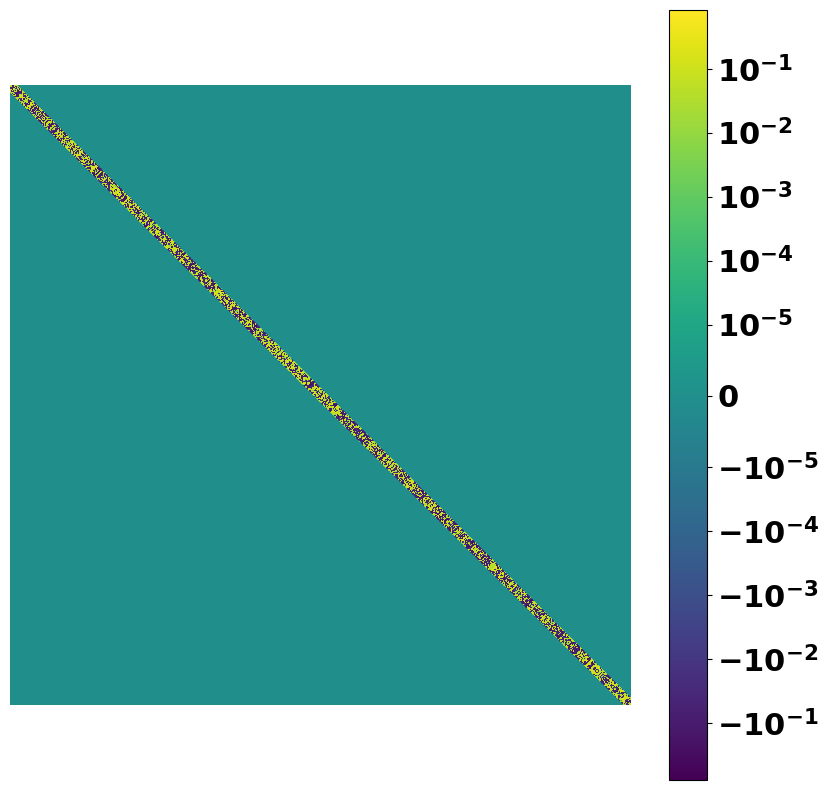

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

m = ax.imshow(k, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)
plt.colorbar(m)
ax.set_axis_off()


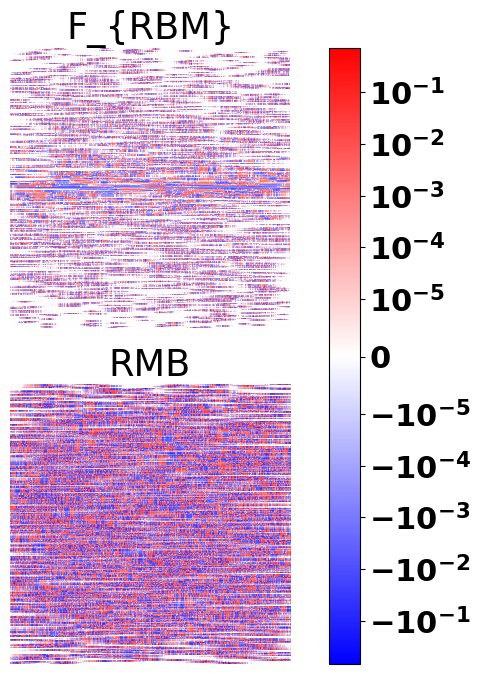

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))

p = ax[0].imshow(
    v_plot,
    norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
ax[0].set_axis_off()
ax[0].set_title("F_{RBM}")





p = ax[1].imshow(
    v_k_plot,
    norm=colors.SymLogNorm(linthresh=1e-5),
    cmap='bwr',
)
ax[1].set_axis_off()
ax[1].set_title("RMB")




fig.colorbar(p, ax=ax)



In [26]:
x = np.linspace(-2, 2, 20)
dx = x[1]-x[0]
theory = (4 - x ** 2) ** (1/2) * dx

Text(0.5, 1.0, '$k$ $\\lambda$ distribution')

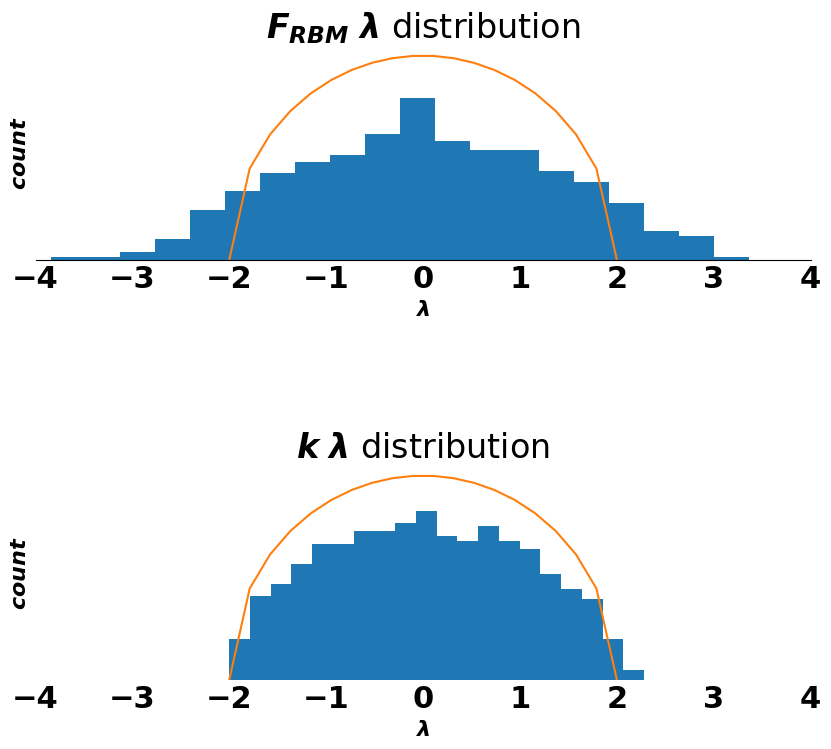

In [27]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(e, density=True, bins=20)
ax[0].plot(x,theory)
ax[0].set_xlim(-4,4)
ax[0].set_aspect(5)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].set_ylabel("$count$", fontsize=16)
ax[0].set_xlabel("$\lambda$", fontsize=16)
ax[0].set_yticks([])
ax[0].tick_params(axis='both', which='both',length=0)

ax[0].set_title("$F_{RBM}$ $\lambda$ distribution", fontsize=24)


ax[1].hist(e_k, density=True, bins=20)
ax[1].plot(x,theory)
ax[1].set_xlim(-4,4)
ax[1].set_aspect(5)

plt.box(False)

ax[1].set_ylabel("$count$", fontsize=16)
ax[1].set_xlabel("$\lambda$", fontsize=16)
# ax.set_xticks([])
ax[1].set_yticks([])
ax[1].tick_params(axis='both', which='both',length=0)

ax[1].set_title("$k$ $\lambda$ distribution", fontsize=24)




Text(0.5, 1.0, '$k$ $\\lambda$ distribution')

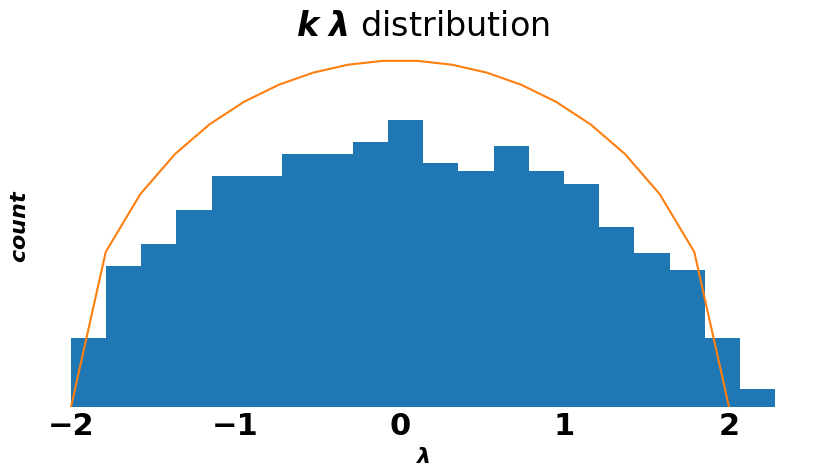

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.hist(e_k, density=True, bins=20)
ax.plot(x,theory)
ax.set_aspect(5)

plt.box(False)

ax.set_ylabel("$count$", fontsize=16)
ax.set_xlabel("$\lambda$", fontsize=16)
# ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both',length=0)

ax.set_title("$k$ $\lambda$ distribution", fontsize=24)



# Localization

In [189]:

def get_rbm(node_count, bandwidth):

    k = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
    k = np.triu(k) - np.triu(k, bandwidth)
    return k + np.transpose(k)

def get_rbm_F(node_count, bandwidth):
    # spectrum of rbm
    k = np.abs(get_rbm(node_count, bandwidth))
    np.fill_diagonal(k, 0.)
#     k = 2 * (k / np.sum(k, axis=0, keepdims=True))

    # Boundary conditions.
    M = stiffness_to_force(k) 
    return M

In [191]:
    k = np.abs(get_rbm(node_count, bandwidth))
    np.fill_diagonal(k, 0.)
#     k = 2 * (k / np.sum(k, axis=0, keepdims=True))

    M = stiffness_to_force(k) 



In [194]:
def localization(u):
    u = u + 1e-20
    u = u /  np.sqrt(np.sum(u **2, axis=-1, keepdims=True))

    # Localization.
    return -1 * np.sum(u ** 2 * np.log(u ** 2), axis = -1)


In [195]:
# spectrum
node_count = 200
bandwidth = 10

# Create force matrix.
M = get_rbm_F(node_count, bandwidth)

# Boundary conditions.
M = fix_boundary(M)

# Find eigenvalues.

e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_bw_10 = v_plot
e_bw_10 = e
o_bw_10 = o

b_10 = bandwidth ** 2 / node_count





In [196]:
# spectrum
node_count = 200
bandwidth = 5

# Create force matrix.
M = get_rbm_F(node_count, bandwidth)

# Boundary conditions.
M = fix_boundary(M)

# Find eigenvalues.

e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_bw_5 = v_plot
e_bw_5 = e
o_bw_5 = o


b_5 = bandwidth ** 2 / node_count





In [197]:
# spectrum
node_count = 200
bandwidth = 30

# Create force matrix.
M = get_rbm_F(node_count, bandwidth)

# Boundary conditions.
M = fix_boundary(M)

# Find eigenvalues.

e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_bw_20 = v_plot
e_bw_20 = e
o_bw_20 = o


b_20 = bandwidth ** 2 / node_count




In [198]:
# spectrum
node_count = 200
bandwidth = 40

# Create force matrix.
M = get_rbm_F(node_count, bandwidth)

# Boundary conditions.
M = fix_boundary(M)

# Find eigenvalues.

e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_bw_40 = v_plot
e_bw_40 = e
o_bw_40 = o


b_40 = bandwidth ** 2 / node_count





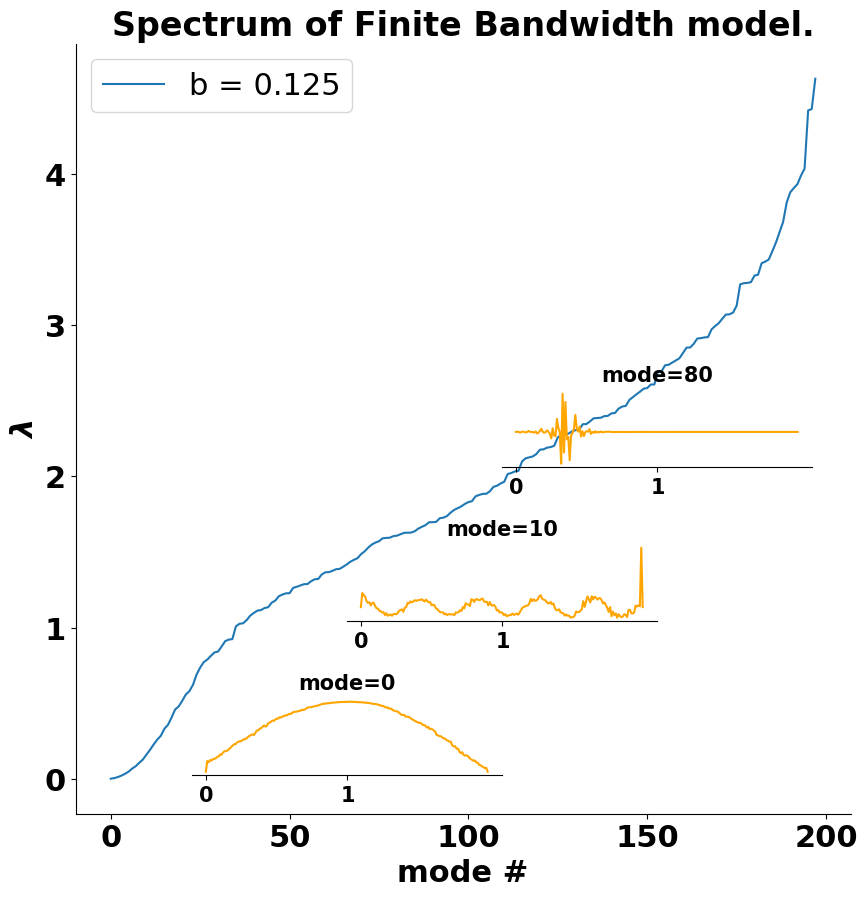

In [199]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(-e_bw_5, label=f"b = {b_5}")
# ax.plot(-e_chain, label="ordered")

ax.legend(prop=dict(weight='normal'))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# sample plots 
axin1 = ax.inset_axes([0.15, 0.05, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_5[0], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title("mode=0", fontsize=15, weight="bold")

# sample plots 
m=10
axin1 = ax.inset_axes([0.35, 0.25, 0.4, 0.1])
axin1.patch.set_alpha(0)


axin1.plot(v_bw_10[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# sample plots 
m=80
axin1 = ax.inset_axes([0.55, 0.45, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_5[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# ax.set_ylim(0, 200)

ax.set_ylabel("$\\lambda$")
ax.set_xlabel("mode #", weight="bold")
ax.set_title("Spectrum of Finite Bandwidth model.", weight="bold", fontsize=24)

filename=figure_directory.joinpath(f"bw_spectrum_{b_5}.png")
plt.savefig(filename, bbox_inches="tight")

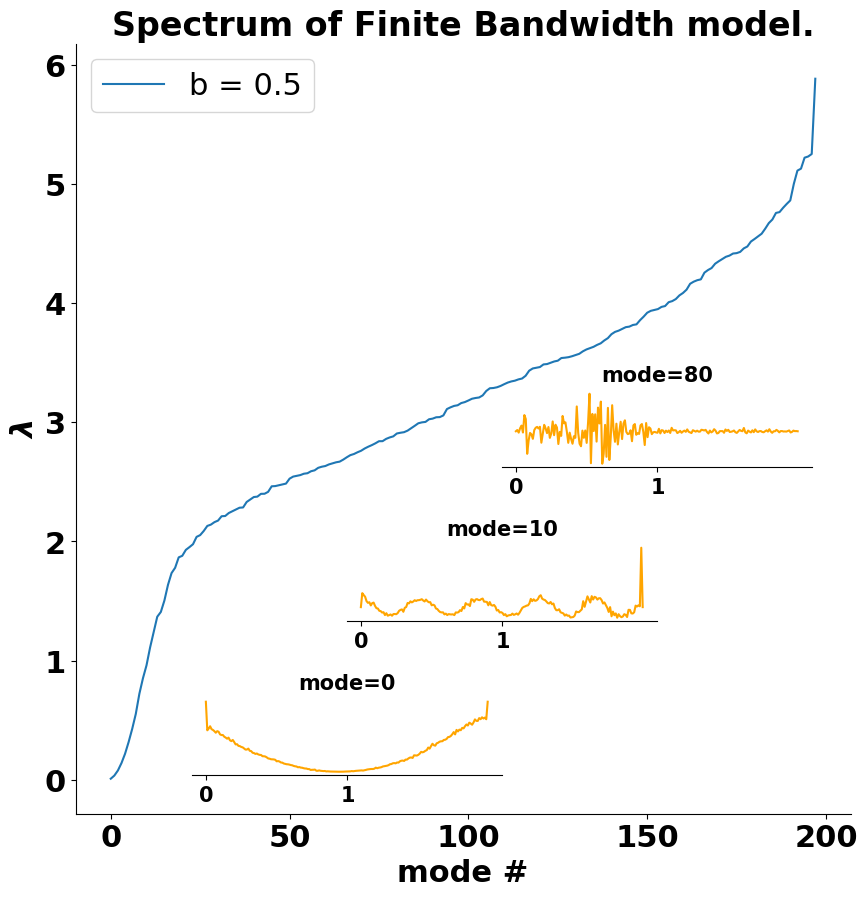

In [200]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(-e_bw_10, label=f"b = {b_10}")
# ax.plot(-e_chain, label="ordered")

ax.legend(prop=dict(weight='normal'))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# sample plots 
axin1 = ax.inset_axes([0.15, 0.05, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_10[0], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title("mode=0", fontsize=15, weight="bold")

# sample plots 
m=10
axin1 = ax.inset_axes([0.35, 0.25, 0.4, 0.1])
axin1.patch.set_alpha(0)


axin1.plot(v_bw_10[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# sample plots 
m=80
axin1 = ax.inset_axes([0.55, 0.45, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_10[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# ax.set_ylim(0, 200)

ax.set_ylabel("$\\lambda$")
ax.set_xlabel("mode #", weight="bold")
ax.set_title("Spectrum of Finite Bandwidth model.", weight="bold", fontsize=24)

filename=figure_directory.joinpath(f"bw_spectrum_{b_10}.png")
plt.savefig(filename, bbox_inches="tight")

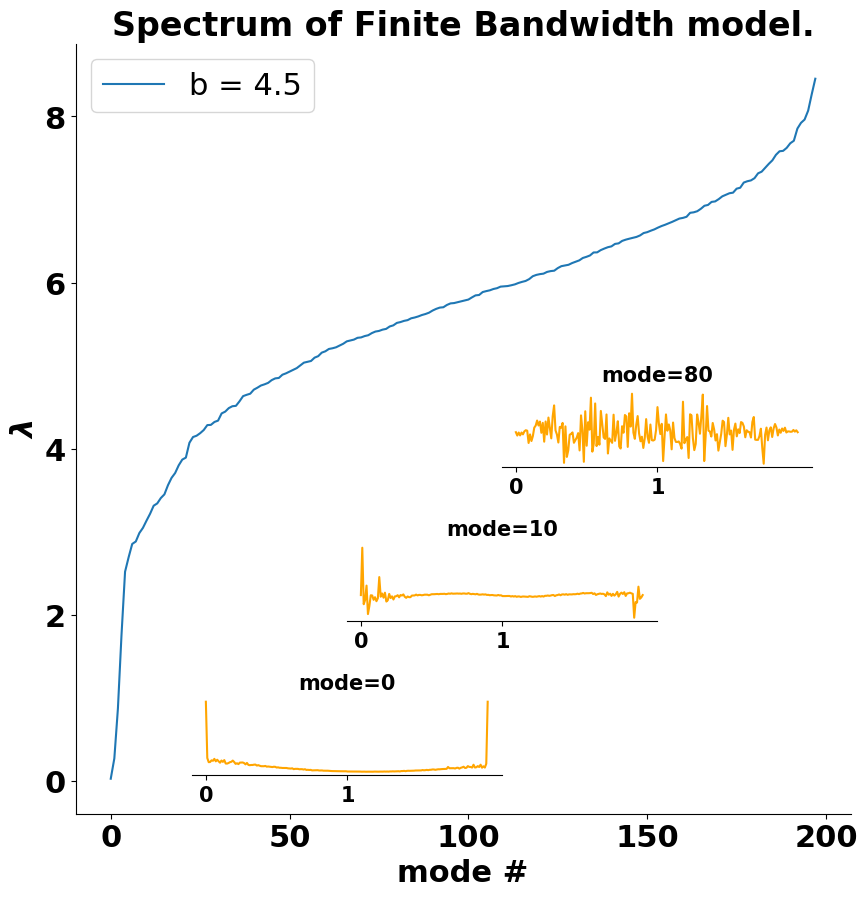

In [201]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(-e_bw_20, label=f"b = {b_20}")
# ax.plot(-e_chain, label="ordered")

ax.legend(prop=dict(weight='normal'))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# sample plots 
axin1 = ax.inset_axes([0.15, 0.05, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_20[0], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title("mode=0", fontsize=15, weight="bold")

# sample plots 
m=10
axin1 = ax.inset_axes([0.35, 0.25, 0.4, 0.1])
axin1.patch.set_alpha(0)


axin1.plot(v_bw_20[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# sample plots 
m=80
axin1 = ax.inset_axes([0.55, 0.45, 0.4, 0.1])
axin1.patch.set_alpha(0)
axin1.plot(v_bw_20[m], color='orange')

axin1.get_yaxis().set_visible(False)
axin1.spines['top'].set_visible(False)
axin1.spines['right'].set_visible(False)
axin1.spines['left'].set_visible(False)
axin1.set_xticks((0, 100), (0,1), fontsize=15)
axin1.set_title(f"mode={m}", fontsize=15, weight="bold")


# ax.set_ylim(0, 200)

ax.set_ylabel("$\\lambda$")
ax.set_xlabel("mode #", weight="bold")
ax.set_title("Spectrum of Finite Bandwidth model.", weight="bold", fontsize=24)

filename=figure_directory.joinpath(f"bw_spectrum_{b_20}.png")
plt.savefig(filename, bbox_inches="tight")

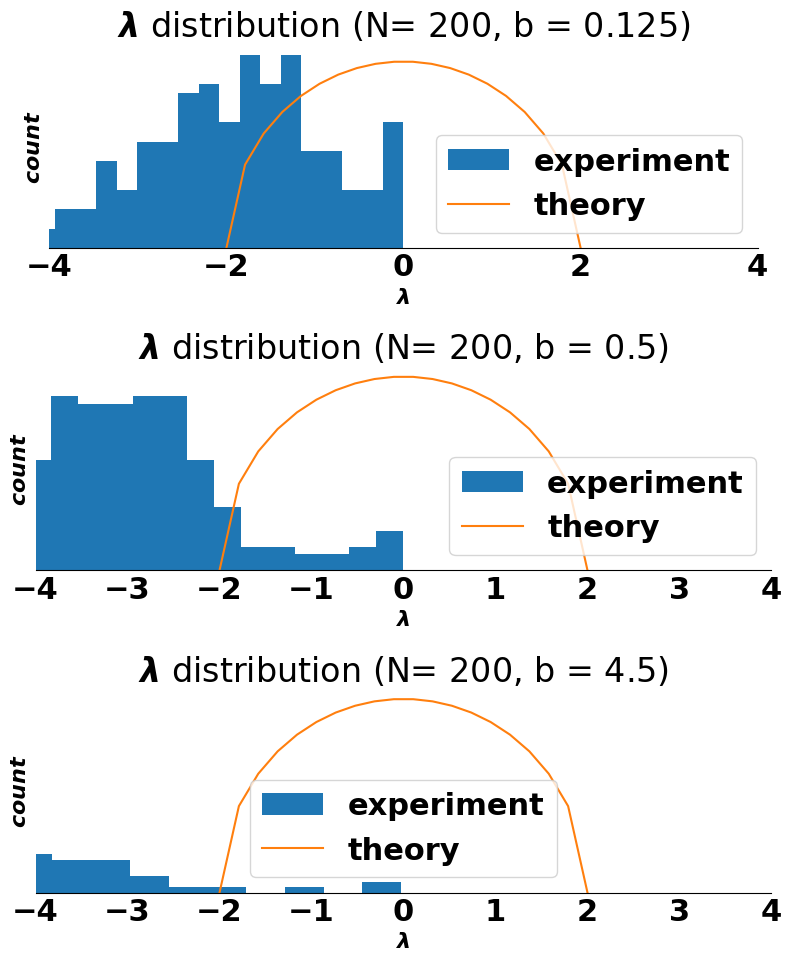

In [202]:
x = np.linspace(-2, 2, 20)
dx = x[1]-x[0]
theory = (4 - x ** 2) ** (1/2) * dx

fig, ax = plt.subplots(3,1, figsize=(10,10))

ax[0].hist(e_bw_5, density=True, bins=20, label="experiment")
ax[0].plot(x,theory, label="theory")
ax[0].set_xlim(-4,4)
ax[0].set_aspect(5)
ax[0].legend()

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].set_ylabel("$count$", fontsize=16)
ax[0].set_xlabel("$\lambda$", fontsize=16)
ax[0].set_yticks([])
ax[0].tick_params(axis='both', which='both',length=0)

ax[0].set_title(f"$\\lambda$ distribution (N= {node_count}, b = {b_5})", fontsize=24)



ax[1].hist(e_bw_10, density=True, bins=20, label="experiment")
ax[1].plot(x,theory, label="theory")
ax[1].set_xlim(-4,4)
ax[1].set_aspect(5)
ax[1].legend()

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax[1].set_ylabel("$count$", fontsize=16)
ax[1].set_xlabel("$\lambda$", fontsize=16)
ax[1].set_yticks([])
ax[1].tick_params(axis='both', which='both',length=0)

ax[1].set_title(f"$\\lambda$ distribution (N= {node_count}, b = {b_10})", fontsize=24)

ax[2].hist(e_bw_20, density=True, bins=20, label="experiment")
ax[2].plot(x,theory, label="theory")
ax[2].set_xlim(-4,4)
ax[2].set_aspect(5)
ax[2].legend()

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)

ax[2].set_ylabel("$count$", fontsize=16)
ax[2].set_xlabel("$\lambda$", fontsize=16)
ax[2].set_yticks([])
ax[2].tick_params(axis='both', which='both',length=0)

ax[2].set_title(f"$\\lambda$ distribution (N= {node_count}, b = {b_20})", fontsize=24)
plt.tight_layout()
filename = figure_directory.joinpath("fixed_bandwidth_circle.png")
plt.savefig(filename,  bbox_inches="tight")


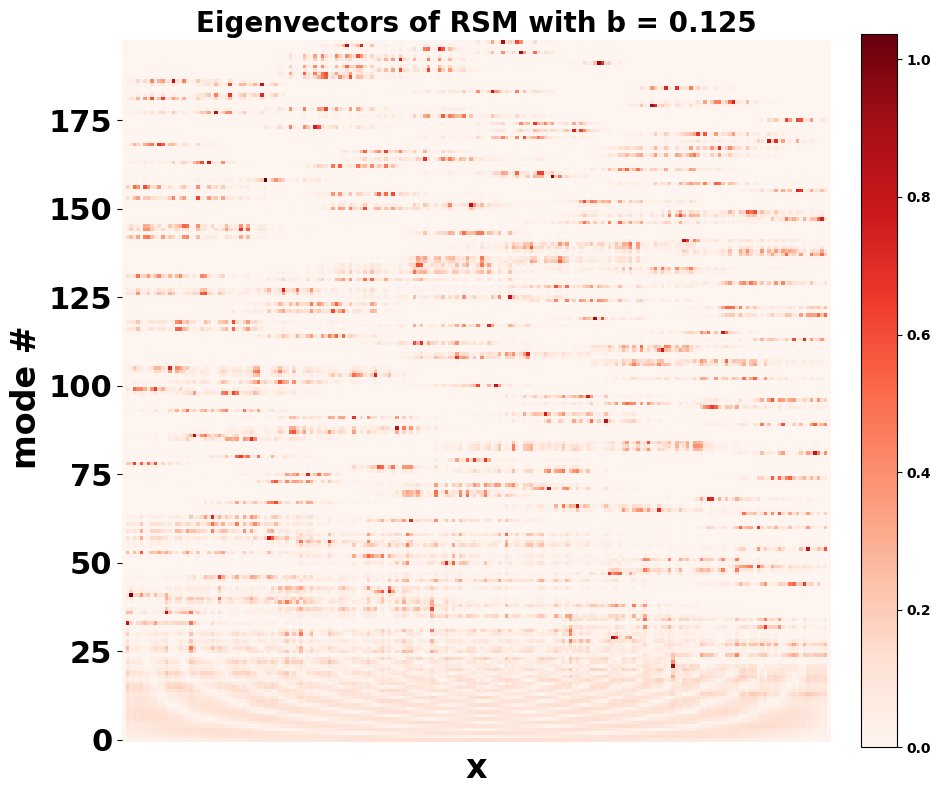

In [234]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_bw_5 / np.amax(v_bw_5)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with b = {b_5}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("RSM_5.png")
plt.savefig(filename, bbox_inches="tight")





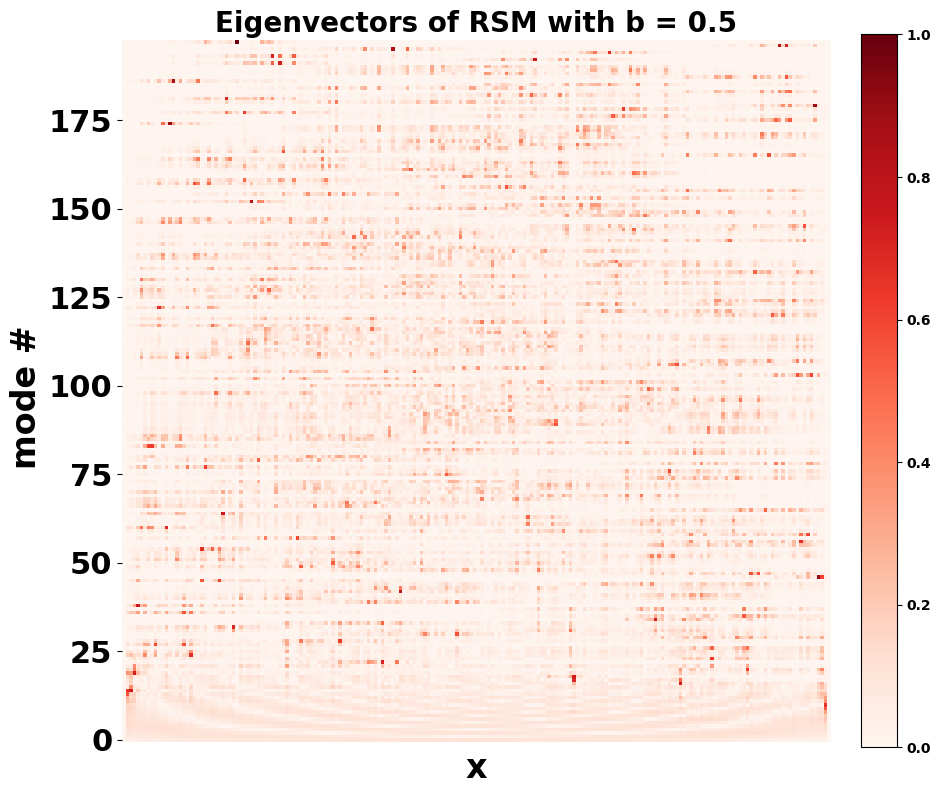

In [235]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_bw_10 / np.amax(v_bw_10)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with b = {b_10}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("RSM_10.png")
plt.savefig(filename, bbox_inches="tight")






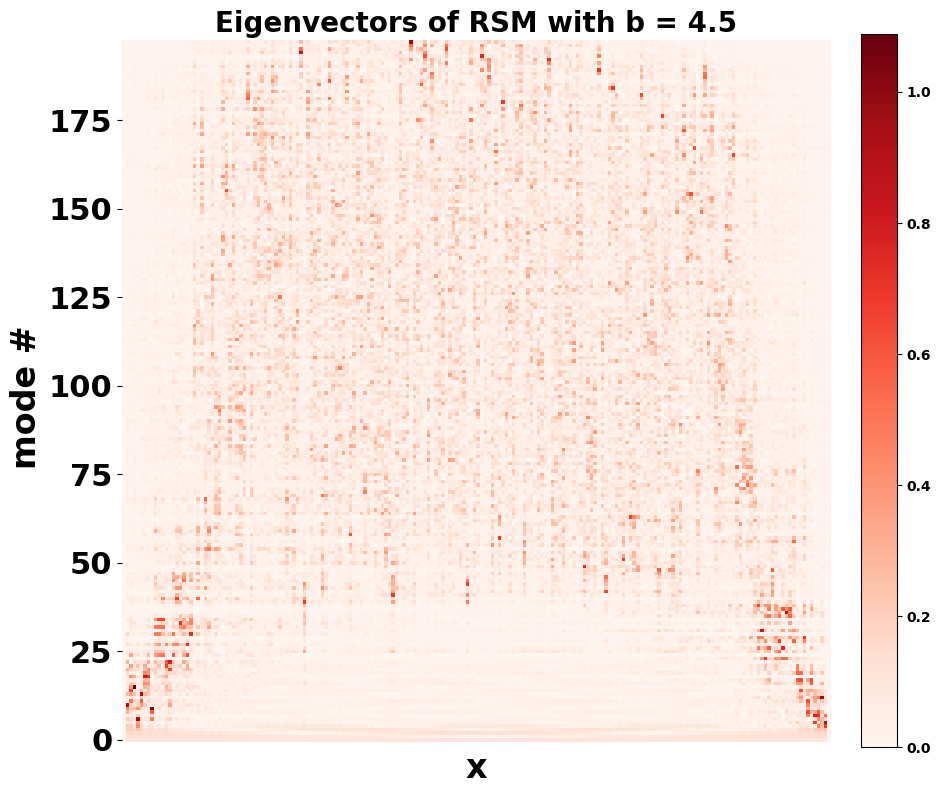

In [236]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_bw_20 / np.amax(v_bw_20)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with b = {b_20}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("RSM_20.png")
plt.savefig(filename, bbox_inches="tight")







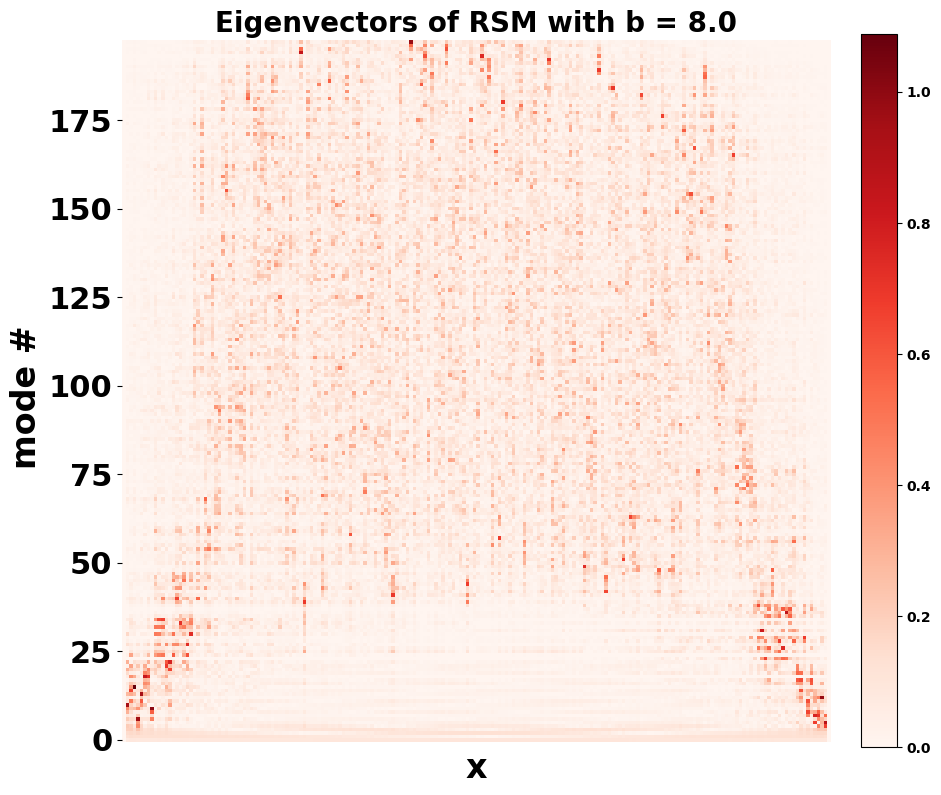

In [237]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_bw_20 / np.amax(v_bw_20)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with b = {b_40}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath("RSM_40.png")
plt.savefig(filename, bbox_inches="tight")








## vary W

In [219]:
node_count = 200

b_RBM_n = {}

nc_test = np.array([100, 200, 500])

for node_count in nc_test:
    bm_max = np.sqrt(10 * node_count)

    band_width_test = np.linspace(2, bm_max, 10)
    beta_RBM = []
    var_RBM = []
    for W in notebook.tqdm(band_width_test):

        # Get rbm.
        k = get_rbm(node_count, W)

        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

        v_k = np.transpose(v_k)

        # compute localization
        H = localization(v_k)
        v = variance_metric(v_k)


        # Compute mean
        beta_RBM.append(mean_localization_length(H, node_count) / node_count)
        var_RBM.append(np.mean(v[1]))

    b_RBM_n[node_count] = (beta_RBM, var_RBM)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

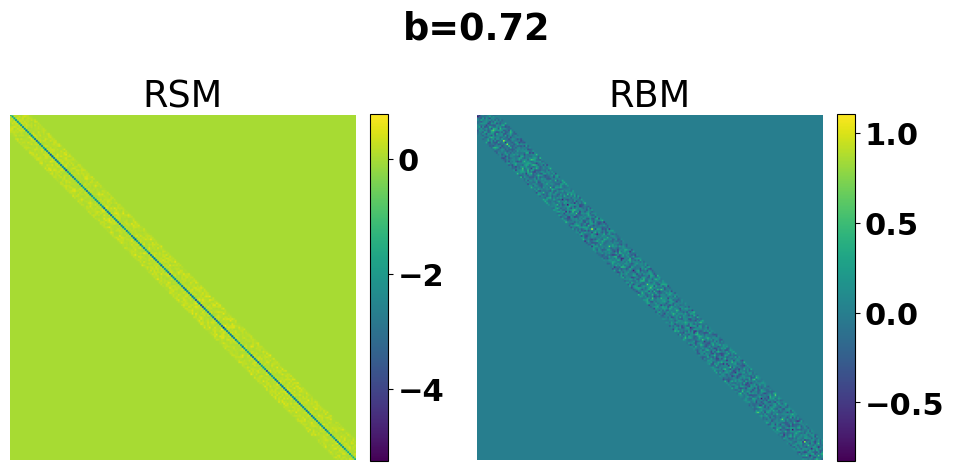

In [220]:
k_rbm = get_rbm_F(200, 12)
k_a = k = get_rbm(200, 12)

b = 12 ** 2 / 200

fig, ax = plt.subplots(1,2, figsize=(10,5))

a=ax[0].imshow(k_rbm)
ax[0].axis('off')
ax[0].set_title("RSM")



plt.colorbar(a, ax=ax[0], fraction=0.046, pad=0.04)
a = ax[1].imshow(k_a)
plt.colorbar(a, ax=ax[1], fraction=0.046, pad=0.04)

ax[1].set_title("RBM")
ax[1].axis('off')

plt.suptitle(f"b={b}", weight="bold")

plt.tight_layout()

filename=figure_directory.joinpath("rsm_rbm_example.png")
plt.savefig(filename, bbox_inches="tight")

In [221]:
node_count = 200

b_RSM_n = {}

nc_test = np.array([100, 200, 500])


for node_count in nc_test:
    beta_A = []
    var_A = []
    for W in notebook.tqdm(band_width_test):

        # Get rbm.
        k = get_rbm_F(node_count, W)

        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

        v_k = np.transpose(v_k)

        # compute localization
        H = localization(v_k)
        v = variance_metric(v_k)

        # Compute mean
        beta_A.append(mean_localization_length(H, node_count) / node_count)
        var_A.append(np.mean(v[1]))

    b_RSM_n[node_count] = (beta_A, var_A)



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [222]:
x = (band_width_test) ** 2 / node_count

In [223]:
beta_RBM

[0.00949781474871412,
 0.15727921356689684,
 0.40870727210633856,
 0.5772331265981431,
 0.707670482213294,
 0.7911144117451554,
 0.8364200792072187,
 0.8783741401228186,
 0.9040003881895559,
 0.9205375119797548]

In [224]:
beta_A

[0.033606019492686254,
 0.15405527848232262,
 0.29199545200118043,
 0.3958186101417744,
 0.4427438439924803,
 0.45789901957982493,
 0.4388559085883695,
 0.3848273827737013,
 0.379791476636531,
 0.3608410832764047]

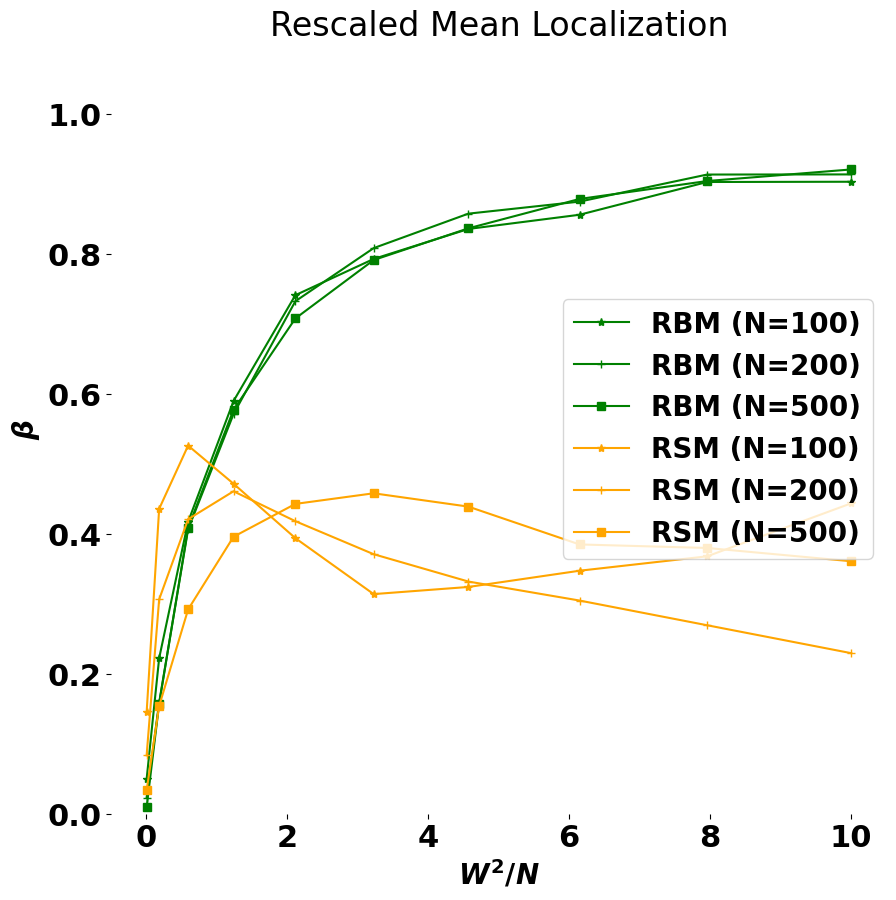

In [233]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

shapes=["*", "+", "s"]

for e_, (k, v) in enumerate(b_RBM_n.items()):
    ax.plot(x, v[0], marker = shapes[e_], color="green", label=f"RBM (N={k})")
    

for e_, (k, v) in enumerate(b_RSM_n.items()):
    ax.plot(x, v[0], marker = shapes[e_], color="orange", label=f"RSM (N={k})")
    
# ax.plot(x, beta_A, marker = "*", label="RSM")

# ax.plot(x, beta_A, marker = "+", color="orange")



ax.set_ylim(0, 1.1)

plt.box(False)
ax.legend(fontsize=20)
ax.set_ylabel("$\\beta$", fontsize=20)
ax.set_xlabel("$W ^2 / N$", fontsize=20)
ax.set_title("Rescaled Mean Localization", fontsize=24)

filename=figure_directory.joinpath("RSM_RBM_localization.png")
plt.savefig(filename, bbox_inches="tight")

In [226]:
b_RBM_n[200][1]

[-0.06600812362604928,
 -0.3593865333244019,
 -0.2928159711276943,
 -0.3285952907031448,
 -0.3667081030093641,
 -0.37336476050393946,
 -0.2968997154383186,
 -0.3097522497462986,
 -0.344572042155589,
 -0.3668751772553932]

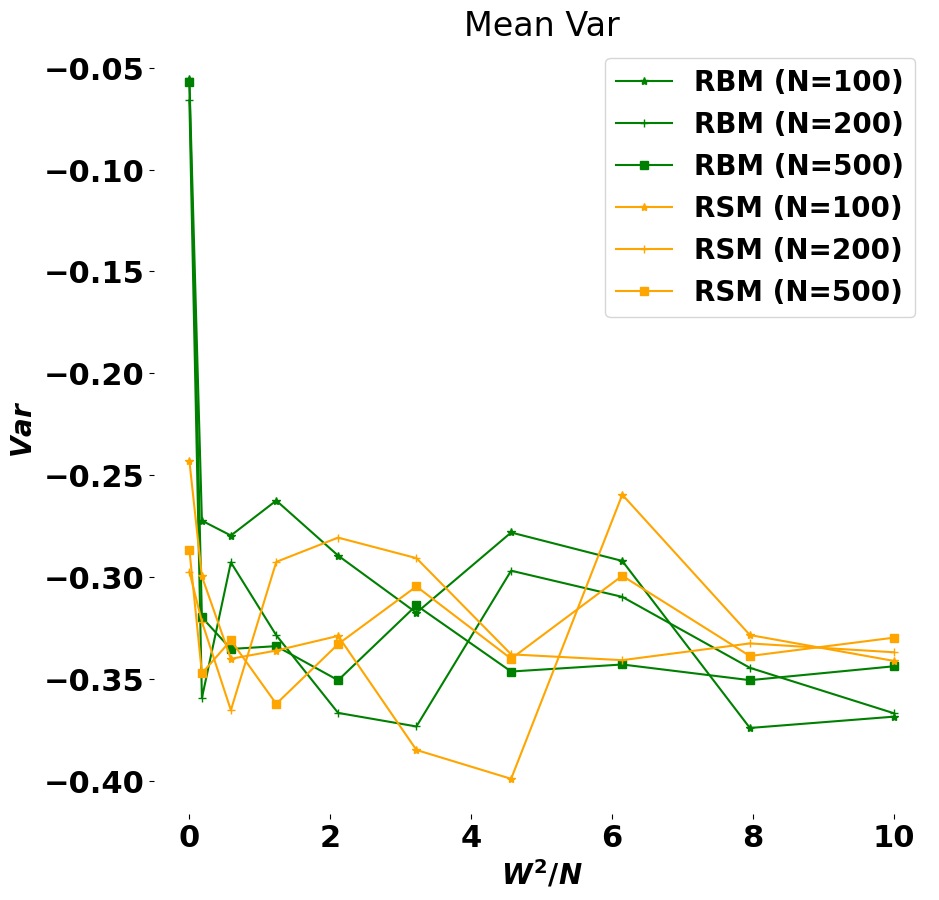

In [232]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

shapes=["*", "+", "s"]

for e_, (k, v) in enumerate(b_RBM_n.items()):
    ax.plot(x, v[1], marker = shapes[e_], color="green", label=f"RBM (N={k})")
    

for e_, (k, v) in enumerate(b_RSM_n.items()):
    ax.plot(x, v[1], marker = shapes[e_], color="orange", label=f"RSM (N={k})")
    
# ax.plot(x, beta_A, marker = "*", label="RSM")

# ax.plot(x, beta_A, marker = "+", color="orange")



# ax.set_ylim(0, 1.1)

plt.box(False)
ax.legend(fontsize=20)
ax.set_ylabel("$Var$", fontsize=20)
ax.set_xlabel("$W ^2 / N$", fontsize=20)
ax.set_title("Mean Var", fontsize=24)

filename=figure_directory.joinpath("RSM_RBM_localization_var.png")

plt.savefig(filename, bbox_inches="tight")

# Localization as function of coordination number

In [313]:
def get_a_fixed_z(node_count, z):
    k = np.abs(np.random.normal(size=(node_count, node_count)))
    k = k * np.random.binomial(1, p=z / (node_count - 1), size=(node_count, node_count))
    k = np.triu(k)
    return k + np.transpose(k)

def get_z_F(node_count, z):
    # spectrum of rbm
    k = get_a_fixed_z(node_count, z)
    np.fill_diagonal(k, 0.)

    # Boundary conditions.
    M = stiffness_to_force(k) 
    return M

def get_k_poisson(node_count):
    # Make symmetric.
    nn_k = np.ones(node_count - 1) * node_count ** 2
    return np.diag(nn_k, 1) + np.diag(nn_k, -1)

def mean_min_localization(H, node_count):
    H_min = np.min(H)
    H_GOE = gaussian_entropy(node_count)
    return node_count * np.exp(H_min - H_GOE)   

def localization(u):
    u = u + 1e-20
    u = u /  np.sqrt(np.sum(u **2, axis=-1, keepdims=True))

    
    # Localization.
    return -1 * np.sum(u ** 2 * np.log(u ** 2), axis = -1)



In [314]:
get_a_fixed_z(500, 100)

array([[1.81365971, 0.        , 0.69656881, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69656881, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77847535],
       [0.        , 0.        , 0.        , ..., 0.        , 0.77847535,
        0.        ]])

In [327]:
node_count = 100


k =  get_k_poisson(node_count) / node_count ** 2 * 0
k = stiffness_to_force(k)

# Compute spectrum.
e_k, v_k = linalg.eigh(fix_boundary(k))

v_plot = np.transpose(v_k)

# # compute localization
H = localization(np.transpose(v_k))

beta =mean_localization_length(H, node_count) / node_count

In [316]:
import pandas as pd
import seaborn as sns

In [338]:
node_count = 500
theta=10.
z = .1

k = get_a_fixed_z(node_count, z) * node_count ** 2 
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e, v = linalg.eigh(fix_boundary(k))

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_t_1 = v_plot
e_t_1 = e
o_t_1 = o


t_1 = theta
z_1 = z





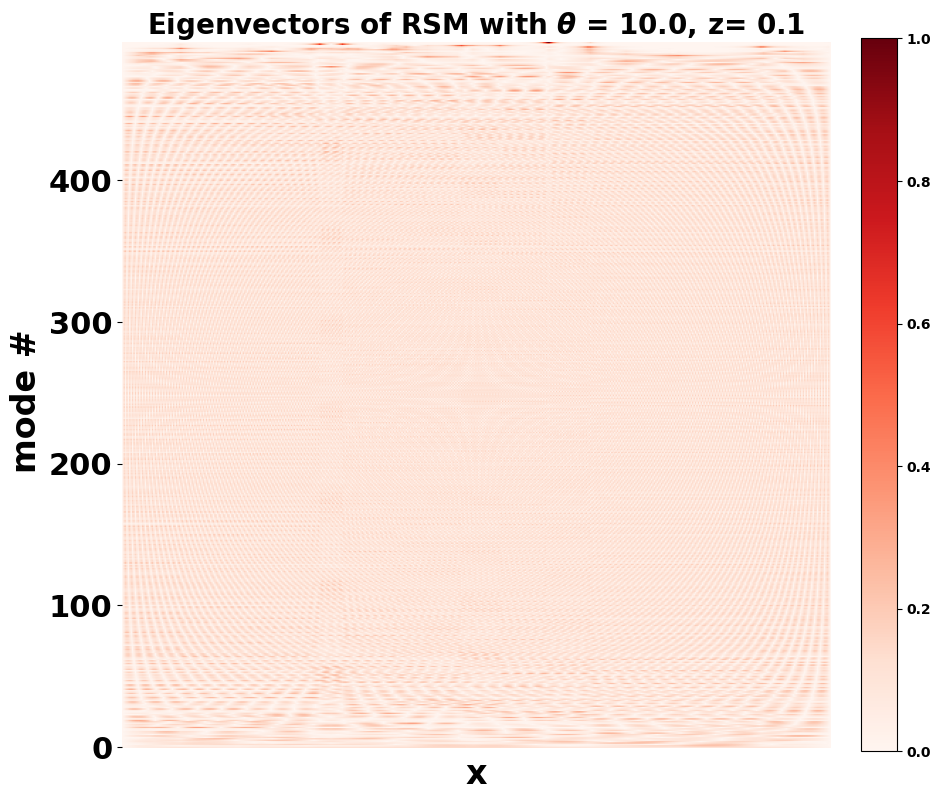

In [341]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_t_1

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with $\\theta$ = {t_1}, z= {z_1}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath(f"sparse_z_{z_1}_t_{t_1}.png")
plt.savefig(filename, bbox_inches="tight")






In [344]:
node_count = 500
theta=10.
z = .5

k = get_a_fixed_z(node_count, z) * node_count ** 2 
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e, v = linalg.eigh(fix_boundary(k))

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_t_2 = v_plot
e_t_2 = e
o_t_2 = o


t_2 = theta
z_2 = z






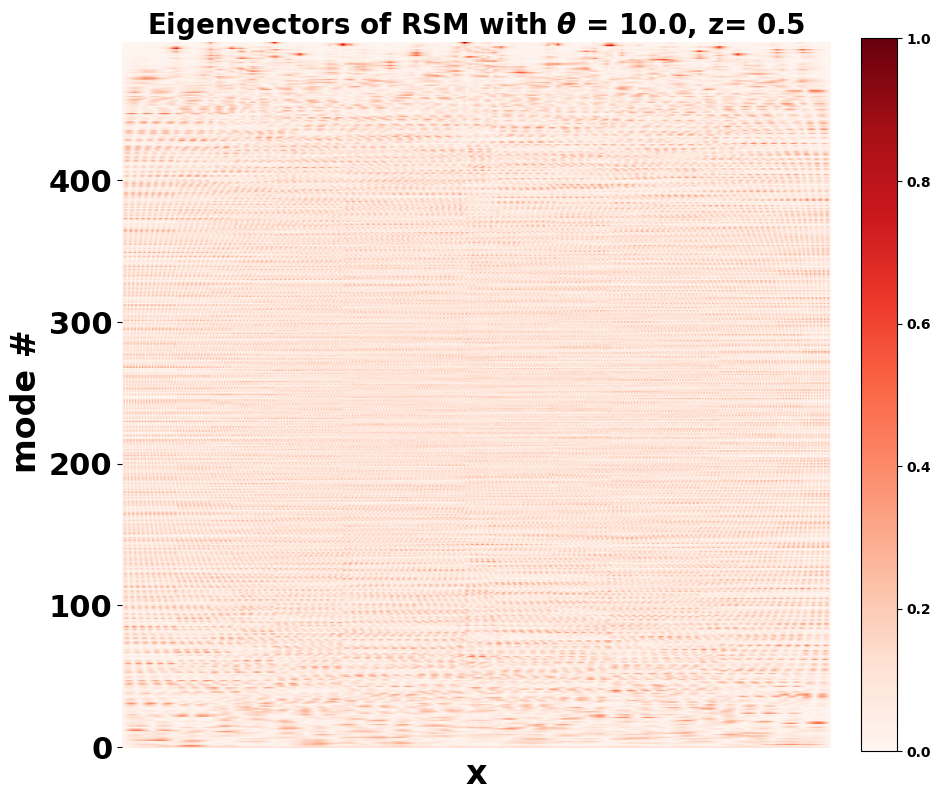

In [345]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_t_2

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with $\\theta$ = {t_2}, z= {z_2}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath(f"sparse_z_{z_2}_t_{t_2}.png")
plt.savefig(filename, bbox_inches="tight")







In [346]:
node_count = 500
theta=2.
z = .1

k = get_a_fixed_z(node_count, z) * node_count ** 2 
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e, v = linalg.eigh(fix_boundary(k))

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_t_3 = v_plot
e_t_3 = e
o_t_3 = o


t_3 = theta
z_3 = z







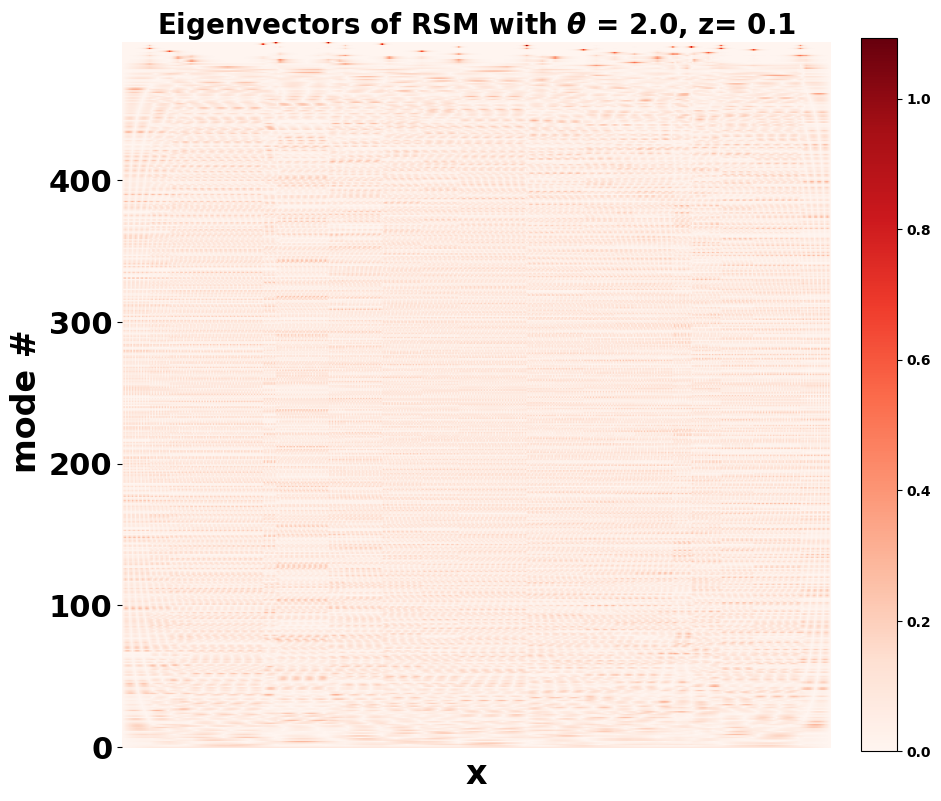

In [347]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_t_3

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with $\\theta$ = {t_3}, z= {z_3}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath(f"sparse_z_{z_3}_t_{t_3}.png")
plt.savefig(filename, bbox_inches="tight")








In [349]:
node_count = 500
theta=1.
z = 1.

k = get_a_fixed_z(node_count, z) * node_count ** 2 
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e, v = linalg.eigh(fix_boundary(k))

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)

# flip.
e = e[::-1]
v_plot = v_plot[::-1]

# frequency
o = np.sqrt(np.abs(e))

v_t_4 = v_plot
e_t_4 = e
o_t_4 = o


t_4 = theta
z_4 = z








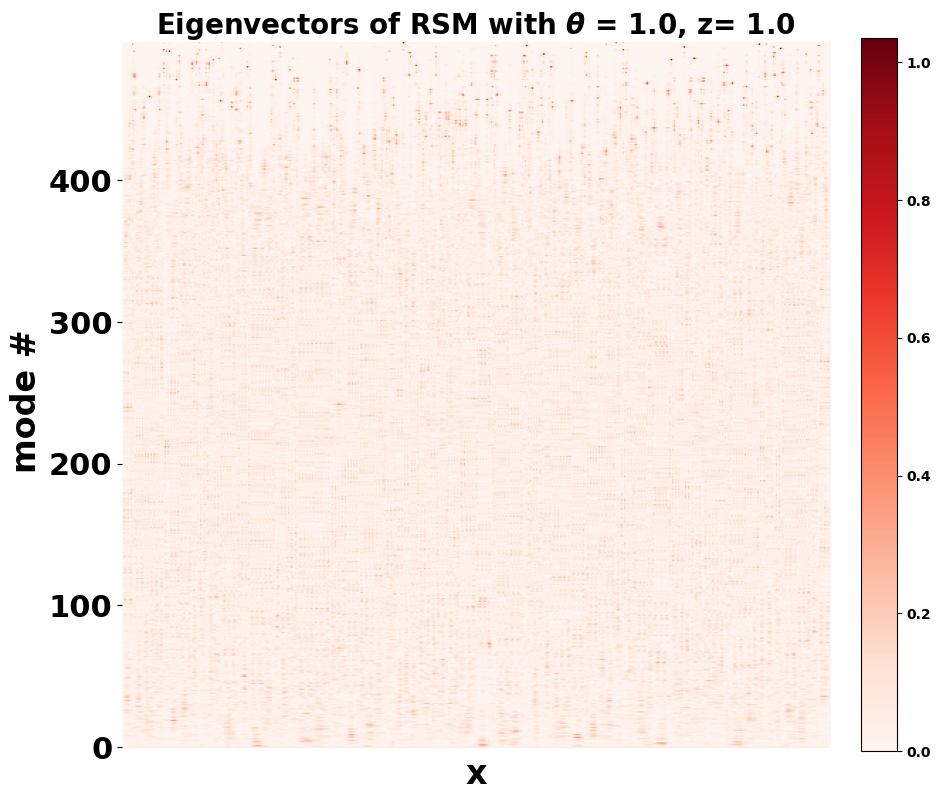

In [351]:
# Plot all eigenmodes

fig, ax = plt.subplots(1, 1, figsize=(10,10))

v_plot = v_t_4

v_plot = v_plot / np.amax(v_plot)

p = ax.imshow(
    np.abs(v_plot),
    cmap='Reds',
    origin="lower"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(())

ax.set_ylabel("mode # ", fontsize=24, weight='bold')
ax.set_xlabel("x", fontsize=24, weight='bold')
c = fig.colorbar(p, fraction=0.046, pad=0.04)
c.ax.tick_params(labelsize=10)
ax.set_title(f"Eigenvectors of RSM with $\\theta$ = {t_4}, z= {z_4}", fontsize = 20, weight='bold')

filename=figure_directory.joinpath(f"sparse_z_{z_4}_t_{t_4}.png")
plt.savefig(filename, bbox_inches="tight")









In [ ]:
10 ** 

## Sweep

In [365]:
node_count = 500

b_RSM_n = {}

z_test = np.linspace(-3, 1, 10)
z_test = 10 ** (z_test)


theta_test = np.linspace(-3, 1, 25)
theta_test = 10 ** (theta_test)

for z in z_test:
    beta_A = []
    var_A = []
    for theta in notebook.tqdm(theta_test):

        # Get rbm.
       
        k = get_a_fixed_z(node_count, z) * node_count ** 2 
        np.fill_diagonal(k, 0.)
        k =  k +  theta * get_k_poisson(node_count)
        k = stiffness_to_force(k)



        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

        v_k = np.transpose(v_k)

        # compute localization
        H = localization(v_k)
        v = variance_metric(v_k)

        # Compute mean
        beta_A.append(mean_localization_length(H, node_count) / node_count)
        var_A.append(np.mean(v[1]))

    b_RSM_n[z] = (beta_A, var_A)




  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [366]:
b_RBM_n = {}

for z in z_test:
    beta_A = []
    var_A = []
    for theta in notebook.tqdm(theta_test):

        # Get rbm.
       
        k = get_a_fixed_z(node_count, z) * node_count ** 2 
        np.fill_diagonal(k, 0.)
        k =  k +  theta * get_k_poisson(node_count)
#         k = stiffness_to_force(k)



        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

        v_k = np.transpose(v_k)

        # compute localization
        H = localization(v_k)
        v = variance_metric(v_k)

        # Compute mean
        beta_A.append(mean_localization_length(H, node_count) / node_count)
        var_A.append(np.mean(v[1]))

    b_RBM_n[z] = (beta_A, var_A)





  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [369]:
import matplotlib.pylab as pl

In [371]:
colors

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.        , 0.99910873, 1.        ],
       [0.        , 0.37843137, 1.        , 1.        ],
       [0.        , 0.83333333, 1.        , 1.        ],
       [0.30044276, 1.        , 0.66729918, 1.        ],
       [0.66729918, 1.        , 0.30044276, 1.        ],
       [1.        , 0.90123457, 0.        , 1.        ],
       [1.        , 0.48002905, 0.        , 1.        ],
       [0.99910873, 0.07334786, 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

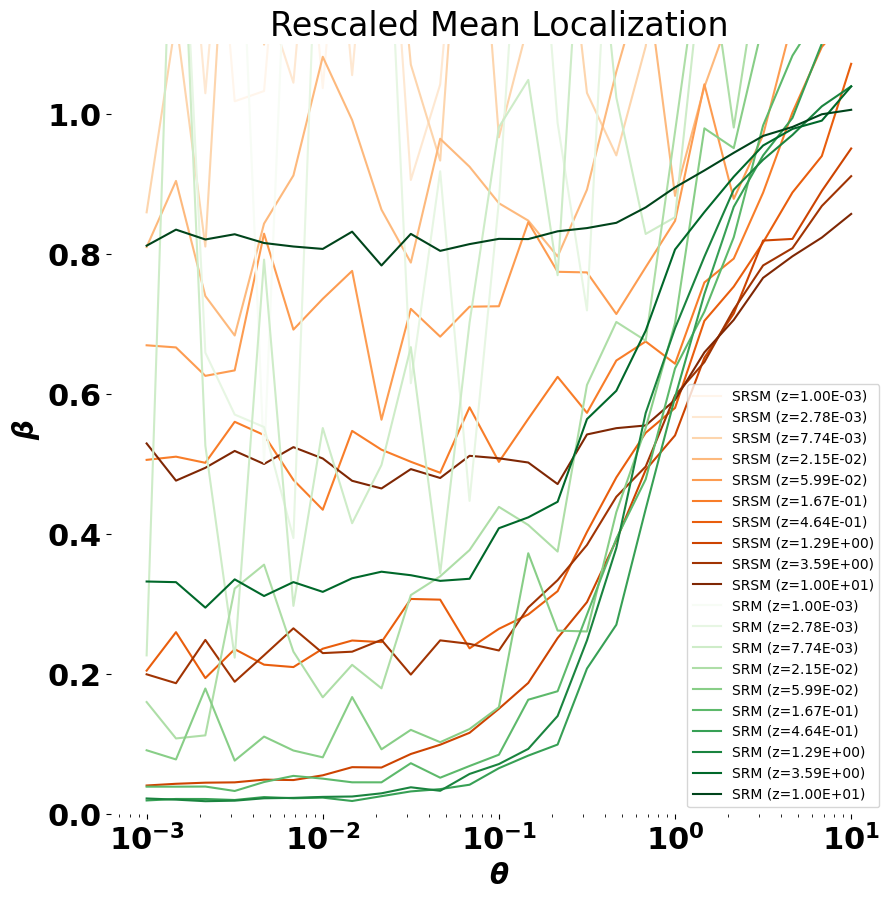

In [377]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

shapes=["*", "+", "s"]

x = theta_test

n = z_test.shape[0]
colors = pl.cm.Oranges(np.linspace(0,1,n))

for e_, (k, v) in enumerate(b_RSM_n.items()):
    ax.plot(x, v[0], color=colors[e_], label=f"SRSM (z={z_test[e_]:.2E})")

n = z_test.shape[0]
colors = pl.cm.Greens(np.linspace(0,1,n))



for e_, (k, v) in enumerate(b_RBM_n.items()):
    ax.plot(x, v[0], color=colors[e_], label=f"SRM (z={z_test[e_]:.2E})")
    
    
# ax.plot(x, beta_A, marker = "*", label="RSM")

# ax.plot(x, beta_A, marker = "+", color="orange")


ax.set_xscale('log')
ax.set_ylim(0, 1.1)

plt.box(False)
ax.legend(fontsize=10,  prop={'size': 10, 'weight': "normal"})
ax.set_ylabel("$\\beta$", fontsize=20)
ax.set_xlabel("$\\theta$", fontsize=20)
ax.set_title("Rescaled Mean Localization", fontsize=24)

filename=figure_directory.joinpath("sparse_RSM_RBM_localization.png")
plt.savefig(filename, bbox_inches="tight")

## sweep 2

In [323]:
node_count = 500

z_test = np.arange(1, 30, 2)
theta_test = np.linspace(-3, 1, 25)
theta_test = 10 ** (theta_test)

data=[]
for theta in notebook.tqdm(theta_test):
    for z in notebook.tqdm(z_test):
        
        k = get_a_fixed_z(node_count, z)
        np.fill_diagonal(k, 0.)
        k =  k +  theta * get_k_poisson(node_count)
        k = stiffness_to_force(k)

        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

    #     # compute localization
        H = localization(np.transpose(v_k))

    #     # Compute mean
        min_ = mean_min_localization(H, node_count) / node_count
        mean_ = mean_localization_length(H, node_count) / node_count

        data.append([z, theta, min_, mean_])



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [249]:
df = pd.DataFrame(data, columns=['z', 'theta', 'min', 'mean'])

In [251]:
df

z   theta       min      mean
0     1   0.001  0.681443  1.484954
1     3   0.001  0.731455  1.491904
2     5   0.001  0.811006  1.490373
3     7   0.001  0.863021  1.487516
4     9   0.001  0.555193  1.480728
..   ..     ...       ...       ...
370  21  10.000  1.520055  1.520111
371  23  10.000  1.520050  1.520112
372  25  10.000  1.520104  1.520112
373  27  10.000  1.520084  1.520112
374  29  10.000  1.520020  1.520111

[375 rows x 4 columns]

ValueError: Data must be 1-dimensional

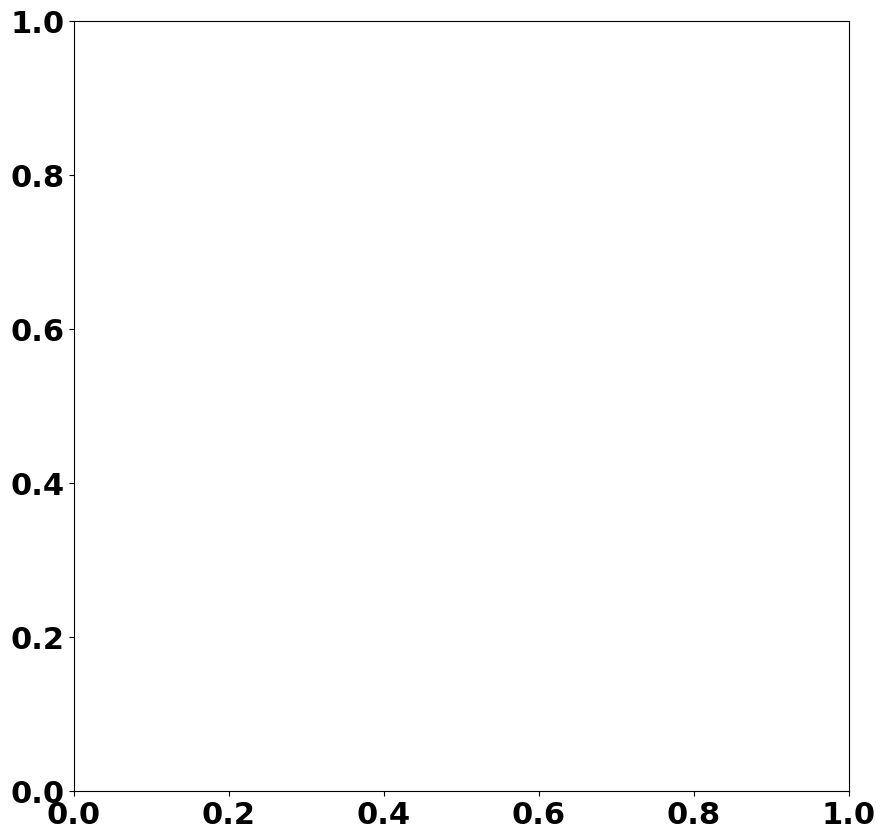

In [257]:
fig, ax = plt.subplots(1,1,figsize=(10,10))


sns.lineplot(df, x = df['theta'], y=df['min'], hue=df['z'], ax=ax)
# plt.box(False)

# ax.set_xlabel("$\\theta$", fontsize=20)
# ax.set_ylabel("$\\beta$", fontsize=20)
# ax.set_title("Random connections", fontsize=24)

In [258]:
df["theta"][21]

0.0014677992676220691

In [259]:
node_count = 500
z = 1
theta = .1


k = get_a_fixed_z(node_count, z)
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e_k, v_k = linalg.eigh(fix_boundary(k))

v_k_plot = np.transpose(v_k)

Text(0.5, 1.0, 'z = 1, $\\theta$: 0.1')

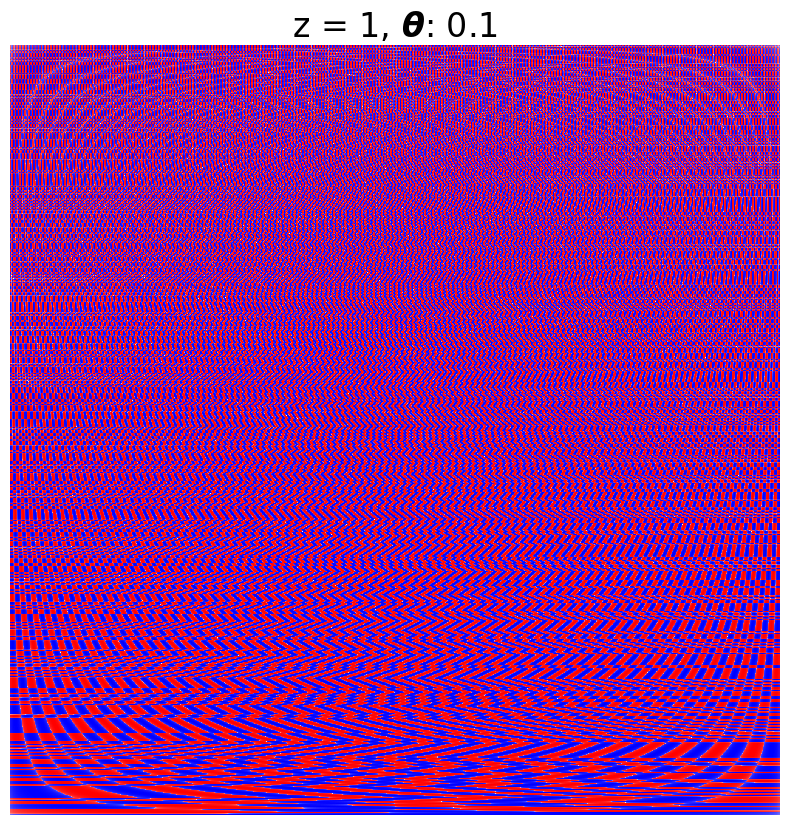

In [260]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))


p = ax.imshow(
    v_k_plot,
    norm=colors.SymLogNorm(linthresh=1e-5),
    cmap='bwr',
)
ax.set_axis_off()
ax.set_title(f"z = {z}, $\\theta$: {theta}", fontsize=24)




# bond noise

In [ ]:

def add_bond(k, bond_pair, k_new, replace=True):
    if replace:
        k_new = k_new
    else:
        k_new = k_new + k[tuple(bond_pair)]
    k[tuple(bond_pair)] = k[tuple(bond_pair[::-1])] = k_new
    return k

def get_valley(M):
    node_count = M.shape[0]
    rhs = np.ones(node_count)
    return np.matmul(linalg.inv(M), rhs)

In [ ]:
node_count = 100

theta = .1
sigma = .1

# Potential noise
potential_downsample_factor = 10
potential_noise_max = 1 

# Make poisson.
nn_k = np.ones(node_count - 1) 
k_n = np.diag(nn_k, 1) + np.diag(nn_k, -1)


# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / potential_downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# RBM
k_rbm = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
k_rbm = np.triu(k_rbm) - np.triu(k_rbm, bandwidth)
k_rbm = k_rbm + np.transpose(k_rbm)
np.fill_diagonal(k_rbm, 0.)


# Create force matrix.
M_rbm = stiffness_to_force(k_rbm)
M_n = stiffness_to_force(k_n)

# Boundary conditions.
M_n = fix_boundary(M_n)
M_rbm = M_n + theta * fix_boundary(M_rbm)
potential_noise = fix_boundary(potential_noise)
M_A = M_n + sigma * potential_noise
M = M_n + theta * M_rbm + sigma * potential_noise

# Find eigenvalues.
e, v = linalg.eigh(M)
e_a, v_a =  linalg.eigh(M_A)
e_rbm, v_rbm = linalg.eigh(M_rbm)
e_n, v_n = linalg.eigh(M_n)

v_n_plot = np.transpose(v_n)
v_a_plot = np.transpose(v_a)
v_rbm_plot = np.transpose(v_rbm)
v_plot = np.transpose(v)


In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(15,4))

p = ax[0].imshow(
    np.abs(v_a_plot),
    cmap='OrRd',
)
p = ax[1].imshow(
    np.abs(v_rbm_plot) ,
    cmap='OrRd',
)
p = ax[2].imshow(
    np.abs(v_plot) ,
    cmap='OrRd',
)

[a.set_axis_off() for a in ax]

fig.colorbar(p, ax=ax)
fig.suptitle(f"$\\theta = {theta}$, $\sigma = {sigma}$")


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,8))
ax.imshow(
    v_difference ,
#     norm=colors.SymLogNorm(linthresh=.001),
 
    cmap='bwr',
)
fig.colorbar(p, ax=ax)


ax.set_axis_off()

In [ ]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))


#     ax[i].plot(np.abs(u_n) / np.abs(u_n).max())
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

In [ ]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

modes = range(node_count - 2 - mode_count, node_count - 2)

for i, m in enumerate(modes):
    ax[i].plot(v_plot[m])
    ax[i].plot(np.abs(v_n_plot[m]))
    ax[i].set_ylim(-1, 1)
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Lowest Eigenmodes", fontsize=16)

# Block Bond Noise

In [ ]:
node_count = 100

# potential noise
downsample_factor = 10
potential_noise_max = 1 / node_count ** 2

# bond noise.
bond_downsample_factor = 20
k_noise_max = (1 / node_count ** 2) 
noise_z = int(10)

# Standard gradient.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# BOND NOISE
k_n = copy.deepcopy(k)

# Add multiple bonds randomly in blocks.
bond_block_count = int(node_count / bond_downsample_factor)
bonds_per_block = int(node_count / bond_block_count)
noise_bond_count_per_block = noise_z * bonds_per_block
print(f"bonds_per_block: {bonds_per_block}")
for b in range(bond_block_count):
    bond_pairs = np.random.randint(0, bonds_per_block, size=(noise_bond_count_per_block, 2))
    
    # Remove self bonds.
    bond_pairs = np.stack([bp for bp in bond_pairs if bp[0]!=bp[1]], axis=0)
    
    # change index to position in `k`
    bond_pairs = bond_pairs + b * bonds_per_block
    print(f"in block {b} have bond max {np.amax(bond_pairs, axis=0)} min {np.amin(bond_pairs, axis=0)}")
    
    # Fixed strength.
    b_strength = np.ones(noise_bond_count) * k_noise_max

    for b, s in zip(bond_pairs, b_strength):
        k_n = add_bond(k_n, b, s, replace=False)

        

# Create force matrix.
M = stiffness_to_force(k) # + potential_noise
M_n = stiffness_to_force(k_n) # + potential_noise

# Boundary conditions.
M = fix_boundary(M)
M_n = fix_boundary(M_n)

# Find eigenvalues.
e, v = linalg.eigh(M)
e_n, v_n = linalg.eigh(M_n)

v= np.pad(v, [[1,1], [0,0]])
v_n= np.pad(v_n, [[1,1], [0,0]])

v_plot = np.transpose(v)
v_n_plot = np.transpose(v_n)
v_difference = np.abs(v_n_plot) - np.abs(v_plot)

# effective valley network.
u = get_valley(M)
u_n = get_valley(M_n)
plt.plot(np.abs(u))
plt.plot(np.abs(u_n))

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")

In [ ]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))


#     ax[i].plot(np.abs(u_n) / np.abs(u_n).max())
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

# sliding block noise

In [ ]:
node_count = 100

# potential noise
downsample_factor = 10
potential_noise_max = 1 / node_count ** 2

# bond noise.
bond_downsample_factor = 10
k_noise_max = (1 / node_count ** 2) * .01
noise_z = 1000

# Standard gradient.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# BOND NOISE
k_n = copy.deepcopy(k)

# Add multiple bonds randomly in blocks.
bond_block_count = int(node_count / bond_downsample_factor)
bonds_per_block = int(node_count / bond_block_count)
half_bonds_per_block = int(bonds_per_block /2)
noise_bond_count_per_block = noise_z * bonds_per_block
z_star = int(noise_z / 2)
for b in range(node_count):
    
    # set valid bonds to connect.
    bond_pair = np.random.randint(-half_bonds_per_block, half_bonds_per_block, size=(z_star))
    
    # change index to position in `k`
    bond_pair = bond_pair + b

    
    # Remove illegal bonds(before/after)
    bond_pair = np.stack([bp for bp in bond_pair if bp>=0 and bp < node_count] , axis=0)
    
    # Remove illegal bonds(bonds w same index)
    bond_pair = np.stack([bp for bp in bond_pair if bp != b] , axis=0)

    # make actual bond pair
    bond_pairs = np.stack([np.ones_like(bond_pair) * b, bond_pair], axis=-1)
    
    # Fixed strength.
    b_strength = np.ones(bond_pairs.shape[0]) * k_noise_max

    for b, s in zip(bond_pairs, b_strength):
        k_n = add_bond(k_n, b, s, replace=False)

        

# Create force matrix.
M = stiffness_to_force(k) # + potential_noise
M_n = stiffness_to_force(k_n) # + potential_noise

# Boundary conditions.
M = fix_boundary(M)
M_n = fix_boundary(M_n)

# Find eigenvalues.
e, v = linalg.eigh(M)
e_n, v_n = linalg.eigh(M_n)

v= np.pad(v, [[1,1], [0,0]])
v_n= np.pad(v_n, [[1,1], [0,0]])

v_plot = np.transpose(v)
v_n_plot = np.transpose(v_n)
v_difference = np.abs(v_n_plot) - np.abs(v_plot)

# effective valley network.
u = get_valley(M)
u_n = get_valley(M_n)
plt.plot(np.abs(u))
plt.plot(np.abs(u_n))

In [ ]:
plt.plot(-np.diag(M_n) * node_count ** 2)

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")

In [ ]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

In [ ]:
plt.imshow(
    M_n, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)

# Diagonal Noise

In [ ]:
def RBM(node_count, W, noise_max):
    k_n = np.zeros([node_count, node_count])
    k_n = np.diag(np.random.rand(node_count) * noise_max)
    for d in range(1, W + 1):
        nn = np.random.rand(node_count  - d) * noise_max
        k_n = k_n + np.diag(nn, d) + np.diag(nn, -d)
    return k_n
    
def RBM_force(node_count, W, noise_max):
    k = RBM(node_count, W, noise_max)
    return stiffness_to_force(k) # + potential_noise




In [72]:
node_count = 200

# bond noise.
W = 20
noise_max= 1.
# noise_max = (1 / node_count ** 2) * 1

# Spectrum statistics.
experiment_count = 100

rbm_s = []
rbm_f = []

for _ in range(experiment_count):
    
    
    # Create force matrix.
    M = RBM(node_count, W, noise_max)
    M_n = stiffness_to_force(M)

    
    # Boundary conditions.
    M = fix_boundary(M)
    M_n = fix_boundary(M_n)

    # Find eigenvalues.
    e, v = linalg.eigh(M)
    e_n, v_n = linalg.eigh(M_n)

    rbm_s.append(e[0])
    rbm_f.append(e_n[0])







NameError: name 'RBM' is not defined

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].hist(rbm_s, bins = int(experiment_count/10))
ax[1].hist(rbm_f, bins = int(experiment_count/10))

In [ ]:
plt.imshow(
    M_n, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")|

# animate

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation

In [ ]:
%matplotlib inline
# %matplotlib notebook

In [ ]:
node_count = 10
nn_k = np.ones(node_count + 1)
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# # Add bonds
# bond_pair = np.array([10, 20])
# k = add_bond(k, bond_pair, k_noise)

# # symmetric
# symmetric_bond_pair = node_count - bond_pair
# k = add_bond(k, symmetric_bond_pair, k_noise)

# # Add multiple bonds randomly

# k_noise = 1
# noise_z = node_count * 2
# noise_bond_count = noise_z * node_count
# bond_pairs = np.random.randint(0, node_count+1, size=(noise_bond_count, 2))
# # strength = np.random.rand(noise_bond_count) * k_noise

# for b, s in zip(bond_pairs, strength):
#     k = add_bond(k, b, k_noise, replace=False)


# Create force matrix.
M = stiffness_to_force(k)
M = fix_boundary(M)

# Find eigenvalues.
e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

omega = np.sqrt(np.abs(e))

v_plot = np.transpose(v)

o_min = omega.min()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

p = ax.imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)


In [ ]:
plt.plot(v_plot[0])

In [ ]:
mode_count = 5

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count):
    ax[i].plot(v_plot[i + 5])
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].tick_params(
    axis='y',          
    which='both',     
    left=False,    
    right=False,         
    labelleft=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].spines.left.set_visible(False)


fig.suptitle("Norm of eigenmodes", fontsize=16)

In [ ]:
mode_count = 5

x0 = np.linspace(0, 1, node_count + 2)
y0 = np.zeros(node_count + 2)
v =  v_plot[-mode_count :] / (node_count + 1) / 2
o = omega[-mode_count :]

fig, ax = plt.subplots(mode_count, 1, figsize=(10, 5))

# initialize plotting for each spring.
nodes = [a.plot([], [], 'ro', ms=3)[0] for a in ax]

def init():
    for i, a in enumerate(ax):
        a.set_xlim(-.1, 1.1)
        a.set_ylim(-1, 1)
        a.set_axis_off()
        a.set_title(f"Mode {4 - i}, $\omega = {o[4-i]:.2f}$")
        a.plot(v_plot[i + 5])
    return nodes

def update(i):
    u = np.sin(2 * np.pi * i * o / o_min)[:, np.newaxis] * v
    for n, u_ in zip(nodes, u):
        n.set_data(x0 + u_, y0)
    return nodes


fps = 30
anim = FuncAnimation(fig, update, frames=np.linspace(0,1,48), interval = 500/fps,
                    init_func=init, blit=True)

f = figure_directory.joinpath("mode_animation.mp4")
writervideo = animation.FFMpegWriter(fps=24)
anim.save(f, writer=writervideo)

# Localization test.

In [ ]:
# 3D barplot
fig = plt.figure(figsize=(3, 3))
ax1 = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(0, 1, node_count), np.linspace(0, 1, node_count))
zz = np.zeros_like(yy)

x_ = y_ = 1 / node_count / 1.1

# color
norm = colors.Normalize(k_noise.min(), k_noise.max())
c = cm.jet(norm(k_noise))

ax1.bar3d(xx.ravel(), yy.ravel(), zz.ravel(), x_, y_, k_noise.ravel(), color=c.reshape([-1, 4]))